# Вступление

Я решил провести анализ [каналов на Youtube](https://www.kaggle.com/datasets/rsrishav/youtube-trending-video-dataset)



# 1 часть -- Импорт библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
import statsmodels.api as sm
import numpy as np

# 2 часть -- Разбейте на сегменты вашу аудиторию и примените для нескольких (примерно 3-4 метрики) метрик тесты Стьюдента, Манна-Уитни, Фишера (Фишера для нескольких сегментов). Проинтерпретируйте результаты, сделайте первые выводы.

In [2]:
ru_segment_df = pd.read_csv('RU_youtube_trending_data.csv').head(200000)
us_segment_df = pd.read_csv('US_youtube_trending_data.csv').head(200000)
ru_category = pd.read_json('RU_category_id.json')
us_category = pd.read_json('US_category_id.json')

display(ru_segment_df.sample(4))
display(us_segment_df.sample(4))

display(ru_category)
display(us_category)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
21641,WGxhTstdcJo,ОПАСНЫЙ ЛЁД. ЗИМНЯЯ РЫБАЛКА на тонком льду в о...,2020-11-29T12:00:05Z,UCsspPYzCpmjeStkAlcyK3yg,Always Alone,26,2020-11-30T00:00:00Z,Рыбалка|Рыбалка с ночёвкой|рыбалка на крупного...,345282,30439,332,2225,https://i.ytimg.com/vi/WGxhTstdcJo/default.jpg,False,False,"первый лёд, рыхлый и опасный, но идут морозы."
171256,DuG6RY0fAKk,Заставил старшего брата съесть грязный чупа-чу...,2023-01-15T13:00:14Z,UCB99Xxp62Ptp6IRJSLVytAQ,clab_33,23,2023-01-18T00:00:00Z,[None],1745153,44370,0,573,https://i.ytimg.com/vi/DuG6RY0fAKk/default.jpg,False,False,NaN
24395,NPEdbm6hrrQ,Однажды в России - Мэра ограбили,2020-12-12T08:00:11Z,UCyxifPm6ErHW08oXMpzqATw,Телеканал ТНТ,23,2020-12-14T00:00:00Z,ТНТ|Телеканал ТНТ|юмор|деньги|стс|что было дал...,1387413,33006,1960,1125,https://i.ytimg.com/vi/NPEdbm6hrrQ/default.jpg,False,False,"Приворовывающий мэр ищет того, кто его ограбил..."
9635,OGFMsvTPDeQ,ОЛЕГ МАЙАМИ - про Айзу и Гуфа. Расставание с И...,2020-09-28T11:45:36Z,UCKgNnp6G0dlwTS1eR4-77yQ,Макарена,22,2020-09-29T00:00:00Z,Олег Майами|Майами|Майами Дневник Хача|Олег Ма...,194166,7251,1185,539,https://i.ytimg.com/vi/OGFMsvTPDeQ/default.jpg,False,False,Лучшие зимние шины - это к Michelin: https://c...


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
153184,uIsg5x19Xu8,73 Questions With Jennifer Lawrence | Vogue,2022-09-06T12:00:03Z,UCRXiA3h1no_PFkb1JCP0yMA,Vogue,24,2022-09-12T00:00:00Z,73 questions|73 questions with jennifer lawren...,3814454,114946,0,4185,https://i.ytimg.com/vi/uIsg5x19Xu8/default.jpg,False,False,The actor Jennifer Lawrence most admires is Me...
192625,RtILsssRJHg,"SHAQ: I Was Jealous of Lebron James, I Wish Th...",2023-03-27T16:00:10Z,UC4qMMCxdNfU6cwpaXZOyUSg,I AM ATHLETE,24,2023-03-29T00:00:00Z,IAA|I AM ATHLETE|PODCAST|I AM ATHLETE PODCAST|...,360747,5735,0,898,https://i.ytimg.com/vi/RtILsssRJHg/default.jpg,False,False,One of the greatest basketball players of all ...
183771,g7lhR6jy5zM,10 Things You SHOULD Be Buying at Costco in Fe...,2023-02-07T15:35:52Z,UC5Qbo0AR3CwpmEq751BIy0g,The Deal Guy,28,2023-02-12T00:00:00Z,the deal guy|costco|costco store|costco secret...,637630,21442,0,588,https://i.ytimg.com/vi/g7lhR6jy5zM/default.jpg,False,False,So many people have shopped at Costco but not ...
154484,DehqjxLBNB8,OFF GRID LIVING | Building Another Solar Array,2022-09-16T18:09:50Z,UC-l69It3hxAY3tkBH_utLNQ,Life Uncontained,22,2022-09-19T00:00:00Z,off grid|off grid living|shipping container ho...,351851,33172,0,2036,https://i.ytimg.com/vi/DehqjxLBNB8/default.jpg,False,False,WANT TO HELP SUPPORT OUR CHANNEL?https://www.p...


,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


,kind,etag,items
0,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."
5,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': '0Z6..."
6,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'K_-..."
7,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'I3I..."
8,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'D1W..."
9,youtube#videoCategoryListResponse,HIrK3n45Uw2IYz9_U2-gK1OsXvo,"{'kind': 'youtube#videoCategory', 'etag': 'QME..."


In [3]:
# обработка категорий в рус сегменте
df_category_rus = pd.DataFrame({'id': [], 'category_title': []})
for i in range(ru_category.shape[0]):
    df_category_rus_i = pd.DataFrame({'id': ru_category['items'][i]['id'], 'category_title': ru_category['items'][i]['snippet']['title']}, index = [i])
    df_category_rus = pd.concat([df_category_rus, df_category_rus_i], ignore_index=True)
df_category_rus['id'] = df_category_rus['id'].astype('int')
display(df_category_rus)

# обработка категорий в американском сегменте

df_category_us = pd.DataFrame({'id': [], 'category_title': []})
for i in range(us_category.shape[0]):
    df_category_us_i = pd.DataFrame({'id': us_category['items'][i]['id'], 'category_title': us_category['items'][i]['snippet']['title']}, index = [i])
    df_category_us = pd.concat([df_category_us, df_category_us_i], ignore_index=True)

df_category_us['id'] = df_category_us['id'].astype('int')
display(df_category_us)

,id,category_title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


,id,category_title
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [4]:
ru_segment_df['categoryId'] = ru_segment_df['categoryId'].astype('int')
ru_segment_df = pd.merge(ru_segment_df, df_category_rus, left_on='categoryId', right_on = 'id', how = 'left')

us_segment_df['categoryId'] = us_segment_df['categoryId'].astype('int')

us_segment_df = pd.merge(us_segment_df, df_category_us, left_on='categoryId', right_on = 'id', how = 'left')

ru_segment_df['region'] = 'Russia'
us_segment_df['region'] = 'US'

overall_df = pd.concat([ru_segment_df, us_segment_df])
display(overall_df.sample(4))

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,category_title,region
89020,bOhCrhglXWI,Блэк Джек - Вложил 500.000 в Ладу Приору,2021-10-29T13:37:11Z,UCgQ1CeGtjCbkvslmG3zTAFA,ILYA STREKAL,2,2021-10-30T00:00:00Z,Илья Стрекаловский|стрекал|ламборгини|самодель...,352193,24834,4247,2619,https://i.ytimg.com/vi/bOhCrhglXWI/default.jpg,False,False,Закажите запчасти с доставкой на Авито по моде...,2.0,Autos & Vehicles,Russia
97073,2hgrI6fj8hU,БЕСКОНЕЧНО НАКАЧИВАЕМ КОЛЕСА У АВТОБУСА!,2021-12-11T14:47:36Z,UCSF6ewY9LS8GnbphwvnZpUg,It's Mamix,22,2021-12-12T00:00:00Z,колесо|колеса|лопнули колесо|колесо от велосип...,1581758,202952,2127,7339,https://i.ytimg.com/vi/2hgrI6fj8hU/default.jpg,False,False,"Скорость мобильного интернета у МегаФона в 1,5...",22.0,People & Blogs,Russia
76391,px7iZfR-RVQ,Manny Pacquiao vs. Yordenis Ugas: First Look H...,2021-08-22T06:23:49Z,UCxm10NbD7LF1fVYcbHbcbXg,PBC ON FOX,17,2021-08-23T00:00:00Z,boxing|boxing highlights|premiere boxing champ...,1090304,13772,924,5383,https://i.ytimg.com/vi/px7iZfR-RVQ/default.jpg,False,False,Watch the first look at some of the best momen...,17.0,Sports,US
101622,ZDa2MDwp5GE,I think I need more friends #shorts,2021-12-26T22:00:07Z,UC9KA9CtiufkjcF8T-bm8TXw,Tommy Zhang,24,2021-12-29T00:00:00Z,[None],2321019,146825,0,6892,https://i.ytimg.com/vi/ZDa2MDwp5GE/default.jpg,False,False,This game is called Joking Hazard. Made by the...,24.0,Entertainment,US


In [5]:
print(overall_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 400000 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           400000 non-null  object 
 1   title              400000 non-null  object 
 2   publishedAt        400000 non-null  object 
 3   channelId          400000 non-null  object 
 4   channelTitle       400000 non-null  object 
 5   categoryId         400000 non-null  int32  
 6   trending_date      400000 non-null  object 
 7   tags               400000 non-null  object 
 8   view_count         400000 non-null  int64  
 9   likes              400000 non-null  int64  
 10  dislikes           400000 non-null  int64  
 11  comment_count      400000 non-null  int64  
 12  thumbnail_link     400000 non-null  object 
 13  comments_disabled  400000 non-null  bool   
 14  ratings_disabled   400000 non-null  bool   
 15  description        387108 non-null  object 
 16  id     

In [6]:
overall_df = overall_df.dropna()
display(overall_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 383900 entries, 0 to 199999
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   video_id           383900 non-null  object 
 1   title              383900 non-null  object 
 2   publishedAt        383900 non-null  object 
 3   channelId          383900 non-null  object 
 4   channelTitle       383900 non-null  object 
 5   categoryId         383900 non-null  int32  
 6   trending_date      383900 non-null  object 
 7   tags               383900 non-null  object 
 8   view_count         383900 non-null  int64  
 9   likes              383900 non-null  int64  
 10  dislikes           383900 non-null  int64  
 11  comment_count      383900 non-null  int64  
 12  thumbnail_link     383900 non-null  object 
 13  comments_disabled  383900 non-null  bool   
 14  ratings_disabled   383900 non-null  bool   
 15  description        383900 non-null  object 
 16  id     

None

In [7]:
display(overall_df.head(3))

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,category_title,region
0,e_Z6upbeYuc,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**,2020-08-12T09:00:16Z,UC2tsySbe9TNrI-xh2lximHA,A4,24,2020-08-12T00:00:00Z,Побег Из КАРТОННОЙ ТЮРЬМЫ Челлендж **2 часть**...,5173063,1052986,29927,63557,https://i.ytimg.com/vi/e_Z6upbeYuc/default.jpg,False,False,Новые кроссовки Reebok Classic Leather Legacy ...,24.0,Entertainment,Russia
1,X5j69JMlbwM,DAVA & Филипп Киркоров – РОЛЕКС (Премьера клип...,2020-08-12T09:00:10Z,UCbh7BxJWCMnWLwJ-traa6Wg,DAVA,22,2020-08-12T00:00:00Z,РОЛЕКС|DAVA|Киркоров|2020|музыка в машину|музы...,636749,58770,28133,5051,https://i.ytimg.com/vi/X5j69JMlbwM/default.jpg,False,False,#Dava #ФилиппКиркоров #Ролекс #Music С огромны...,22.0,People & Blogs,Russia
2,FzJjlIzZlVc,Как Я ЧУТЬ НЕ УМЕР 2 (анимация),2020-08-12T10:00:02Z,UCLNrn6a4Co8D6H7jRZtNPcA,X2DED,1,2020-08-12T00:00:00Z,как я чуть не умер|чуть не умер|история из жиз...,359904,45025,438,2793,https://i.ytimg.com/vi/FzJjlIzZlVc/default.jpg,False,False,Это история анимация о том как я чуть не умер ...,1.0,Film & Animation,Russia


### 2.1 -- Разбивка аудитории на сегменты

Я хочу разбить аудиторию на 3 категории (люди, которые смотрят 3 блогеров/каналы):

* Kuplinov ► Play
* windy31
* OneTwo

In [8]:
ru_segment_one_two = ru_segment_df[
    ru_segment_df['channelTitle'] == 'OneTwo'
]

ru_segment_one_two =  ru_segment_one_two.drop_duplicates('title')
ru_segment_one_two['likes_to_dis'] = ru_segment_one_two['likes'] / ru_segment_one_two['dislikes']

ru_segment_kuplinov = ru_segment_df[
    ru_segment_df['channelTitle'] == 'Kuplinov ► Play'
]

ru_segment_kuplinov = ru_segment_kuplinov.drop_duplicates('title')
ru_segment_kuplinov['likes_to_dis'] = ru_segment_kuplinov['likes'] / ru_segment_kuplinov['dislikes']


ru_segment_windy = ru_segment_df[
    ru_segment_df['channelTitle'] == 'windy31'
]                 

ru_segment_windy = ru_segment_windy.drop_duplicates('title')
ru_segment_windy['likes_to_dis'] = ru_segment_windy['likes'] / ru_segment_windy['dislikes']



display(ru_segment_one_two.head(2))
display(ru_segment_windy.head(2))
display(ru_segment_kuplinov.head(2))


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,category_title,region,likes_to_dis
18,7UNL-r7f4rI,"КОРОЧЕ ГОВОРЯ, ПОПАЛ В ПРОШЛОЕ",2020-08-12T09:59:58Z,UCLaqlgkDM3dkDh4WSbULMEA,OneTwo,23,2020-08-12T00:00:00Z,короче говоря|короче|короче говоря попал в про...,593137,85450,909,7092,https://i.ytimg.com/vi/7UNL-r7f4rI/default.jpg,False,False,Сегодня по непонятным причинам я попал в прошл...,23.0,Comedy,Russia,94.004400
1438,GYH1fI4OIsQ,"КОРОЧЕ ГОВОРЯ, МОИ МЕЧТЫ",2020-08-19T09:59:58Z,UCLaqlgkDM3dkDh4WSbULMEA,OneTwo,23,2020-08-19T00:00:00Z,короче говоря|короче|короче говоря мои мечты|м...,479790,75514,510,4231,https://i.ytimg.com/vi/GYH1fI4OIsQ/default.jpg,False,False,"Короче, я попал в свои мечты. Здесь все идеаль...",23.0,Comedy,Russia,148.066667


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,category_title,region,likes_to_dis
18157,cmWXO2h4Rns,заболел,2020-11-10T15:46:02Z,UCZUrS0zDszsXI_5ir_tI3cg,windy31,20,2020-11-11T00:00:00Z,[None],399232,100910,463,17040,https://i.ytimg.com/vi/cmWXO2h4Rns/default.jpg,False,False,NaN,20.0,Gaming,Russia,217.948164
23464,rxiU9uChuK8,ПРОКЛЯТОЕ ВИДЕО НЕ БЕРИ ЭТУ КОНФЕТУ,2020-12-10T08:18:41Z,UCZUrS0zDszsXI_5ir_tI3cg,windy31,24,2020-12-10T00:00:00Z,takethislolipop|конфета|винди|windy|windy31|ви...,302274,57721,193,3672,https://i.ytimg.com/vi/rxiU9uChuK8/default.jpg,False,False,ПРОКЛЯТОЕ ВИДЕО НЕ БЕРИ ЭТУ КОНФЕТУ===========...,24.0,Entertainment,Russia,299.072539


,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,id,category_title,region,likes_to_dis
27089,8qRvGvPEX0o,КУПЛИНОВ И HYPERPC СОБИРАЮТ ТВОЙ БУДУЩИЙ КОМПЬ...,2020-12-27T16:11:51Z,UCdKuE7a2QZeHPhDntXVZ91w,Kuplinov ► Play,28,2020-12-28T00:00:00Z,Kuplinov Play|Куплинов плей|Куплинов|Kuplinov|...,809420,89450,1510,958,https://i.ytimg.com/vi/8qRvGvPEX0o/default.jpg,False,False,Всем приятного просмотра!Собери свой компьютер...,28.0,Science & Technology,Russia,59.238411
27403,KgRmROCw4LY,Поздравление с Новым 2021 Годом!,2020-12-31T09:00:06Z,UCdKuE7a2QZeHPhDntXVZ91w,Kuplinov ► Play,22,2020-12-31T00:00:00Z,KuplinovPlay|kuplinov|куплинов|куплинов плей|н...,512693,221447,515,26850,https://i.ytimg.com/vi/KgRmROCw4LY/default.jpg,False,False,Поздравляю всех с Новым 2021 Годом! Всем прият...,22.0,People & Blogs,Russia,429.994175


Рассмотрим такие метрики, как:

* кол-во просмотров (view_count)
* кол-во лайокв (likes)
* кол-во дизлайков (dislikes)
* кол-во комментариев (comment_count)
* частота отключения комментариев в категории "Игры" (comments_disabled)

1. Если данные НЕ распределены нормально:
Используем непараметрический тест Манна-Уитни, который сравнивает медианные значения двух групп.
Нулевая гипотеза (H₀): медианы выборок одинаковы.
Решение:
Если p_value > 0.05 → не отвергаем H₀, значит медианы не различаются, выборки схожи.
Если p_value < 0.05 → отвергаем H₀, значит медианы различаются, есть статистически значимые различия.
2. Если данные распределены нормально:
Используем t-тест Стьюдента, который сравнивает средние значения двух групп.
Нулевая гипотеза (H₀): средние значения выборок одинаковы.
Решение:
Если p_value > 0.05 → не отвергаем H₀, средние значения одинаковы, статистических различий нет.
Если p_value < 0.05 → отвергаем H₀, средние значения различаются, есть статистически значимые различия.
Процесс анализа данных:
Шаг 1: Проверка нормальности данных

Используем тест Шапиро-Уилкса, Колмогорова-Смирнова, или визуальные методы (QQ-plot, гистограммы).
Если p_value > 0.05, данные можно считать нормальными → применяем t-тест.
Если p_value < 0.05, данные не нормальны → применяем тест Манна-Уитни.
Шаг 2: Выбор подходящего теста

Нормальные данные → t-тест (анализ средних значений).
Ненормальные данные → тест Манна-Уитни (анализ медиан).


### 2.2 -- Сравнение кол-ва просмотров у каналов "Kuplinov Play" и "Windy31"

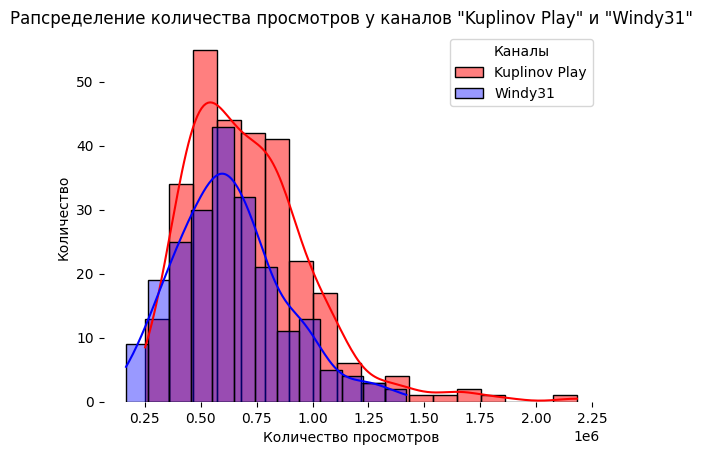

In [9]:
ru_seg_kup_views = sns.histplot(x = ru_segment_kuplinov['view_count'], label = 'Kuplinov Play', color = 'red', kde = True)
us_seg_wind_views = sns.histplot(x = ru_segment_windy['view_count'], label = 'Windy31', alpha = 0.4, color = 'blue', kde = True)
plt.legend(loc = 'upper right', title = 'Каналы')
plt.box(False)
plt.xlabel('Количество просмотров')
plt.ylabel('Количество')
plt.title('Рапсределение количества просмотров у каналов "Kuplinov Play" и "Windy31"')
plt.show()

Text(0.5, 1.0, 'QQ-plot для просотров Windy31')

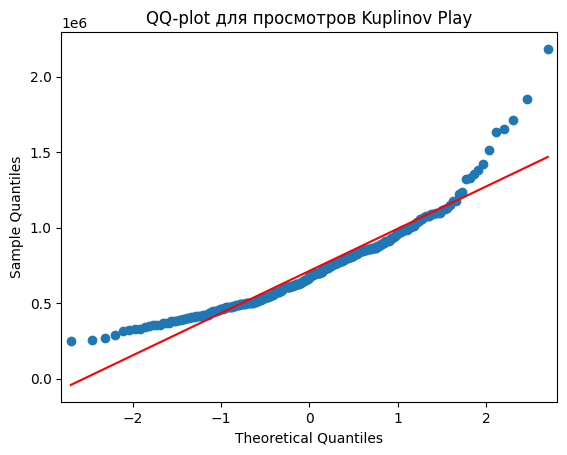

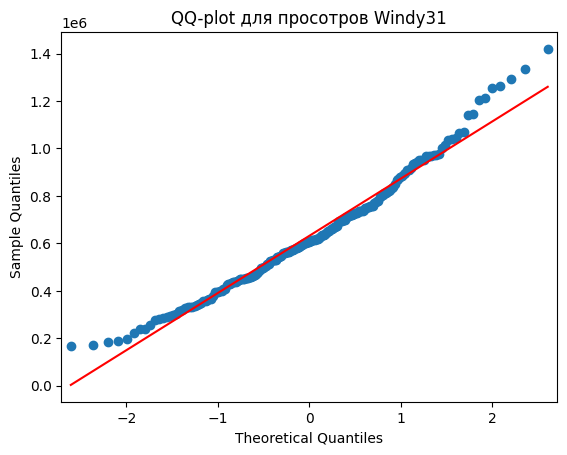

In [10]:
sm.qqplot(ru_segment_kuplinov['view_count'], line = 's')
plt.title('QQ-plot для просмотров Kuplinov Play')
sm.qqplot(ru_segment_windy['view_count'], line = 's')
plt.title('QQ-plot для просотров Windy31')

Как видно, наши квантили намного отличаются от квантилей нормального распределения, поэтому это говорит нам о том, что данне не нормально распределены

Проведемм еще тет Шапиро-Уикка, чтобы аналитически определить, является ли выборка нормальным распределением

In [11]:
stat, p_value = sts.shapiro(ru_segment_kuplinov['view_count'])
print('Просмотры у Куплинова: ', p_value)

stat, p_value = sts.shapiro(ru_segment_windy['view_count'])
print('Просмотры у Винди31: ', p_value)


Просмотры у Куплинова:  7.930519000981052e-12
Просмотры у Винди31:  0.0008065196072440784


Как мы видим -- все нам говорит о том, ччто данные у нас не нормально распределены, а значит, нам надо использовать не параметрические тесты, такие как тест Манна-Уитни (аналог тесту Стьюдента для нормального распределения)

In [12]:
statistics, p_value = sts.mannwhitneyu(ru_segment_kuplinov['view_count'], ru_segment_windy['view_count'])
print(p_value)

0.0023731787663193314


Как мы видим, у нас p_value чуть меньше 0.05, а значит медианные значения кол-ва просмотра у Куплинова и Винди31 отличаются

### 2.3 -- Сравнение кол-ва лайков у каналов "Kuplinov Play" и "Windy31"

Text(0.5, 1.0, 'Распределение количества лайков у каналов "Kuplinov Play" и "Windy31"')

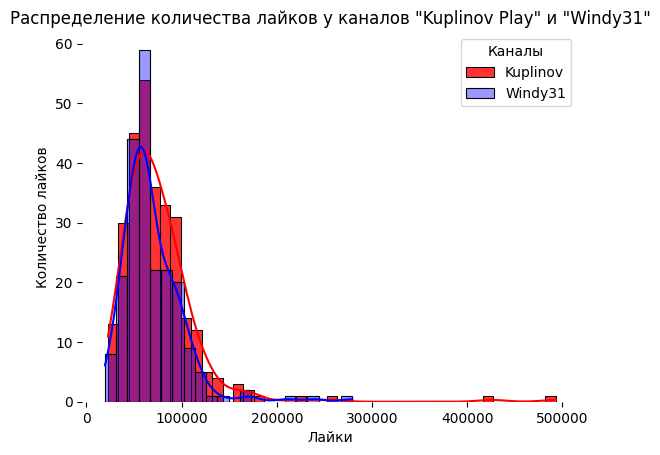

In [13]:
ru_gamming_kup_likes = sns.histplot(x = ru_segment_kuplinov['likes'], label = 'Kuplinov', kde = True, color = 'red', alpha = 0.8)
us_gamming_wind_likes = sns.histplot(x = ru_segment_windy['likes'], label = 'Windy31', kde = True, color = 'blue', alpha = 0.4)

plt.xlabel('Лайки')
plt.ylabel('Количество лайков')
plt.box(False)
plt.legend(loc= 'upper right', title = 'Каналы')
plt.title('Распределение количества лайков у каналов "Kuplinov Play" и "Windy31"')

Text(0.5, 1.0, 'Соответсвие количества лайков у Куплинова нормальному распределению')

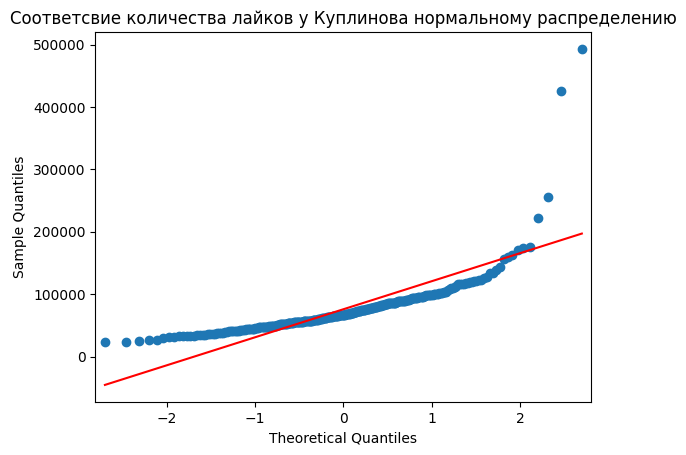

In [14]:
sm.qqplot(ru_segment_kuplinov['likes'], line = 's')
plt.title('Соответсвие количества лайков у Куплинова нормальному распределению')


Text(0.5, 1.0, 'Соответсвие количества лайков у Windy31 нормальному распределению')

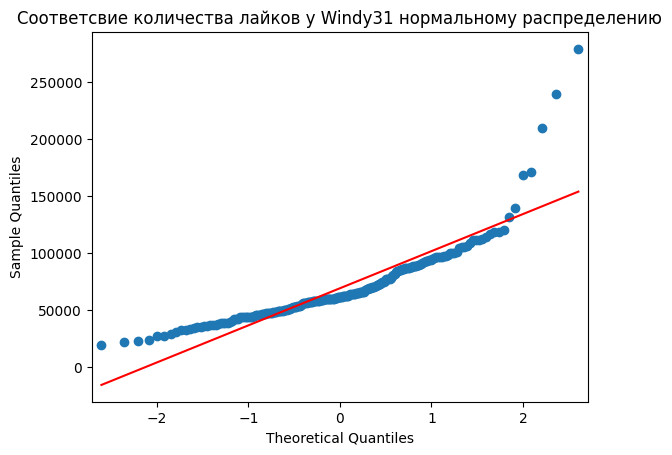

In [15]:
sm.qqplot(ru_segment_windy['likes'], line = 's')
plt.title('Соответсвие количества лайков у Windy31 нормальному распределению')


Как видно, у нас опять данные не похоже на нормальное распределение, убедимся в этом через тест Шапиро-Уилка

In [16]:
stats, p_val_ru = sts.shapiro(ru_segment_kuplinov['likes'])
stats, p_val_us = sts.shapiro(ru_segment_windy['likes'])

print('Соответсвие лайков Куплинова нормальному распределению: ', p_val_ru)
print('Соответсвие лайков Windy31 нормальному распределению: ', p_val_us)

Соответсвие лайков Куплинова нормальному распределению:  3.471794149584657e-24
Соответсвие лайков Windy31 нормальному распределению:  8.394441824318742e-16


Как видно, у нас p_value намного меньше, чем 0.05, а это значит, что H0 нам придется отвергнуть и сказать, что данные у нас распределены НЕ нормально. А значит опять воспользуемся тестом Манна-Уитни, который покажет нам, одинаковые ли у нас медианные значения из этих 2 выборок

In [17]:
statistics, p_value = sts.mannwhitneyu(ru_segment_kuplinov['likes'], ru_segment_windy['likes'])

print(p_value)

0.07191520020072961


Тест нам показал p_value ~ 0.07, а это значит, что медианные значения лайков у видео Куплинова и Windy31 совпадают

### 2.4 -- Сравнение частоты отключения комментариев у Windy31 и OneTwo

Тест Фишера (Fisher's Exact Test)
Тест Фишера используется для проверки взаимосвязи между двумя категориальными (дискретными) переменными в 2x2 таблицах сопряженности. Этот тест особенно полезен, когда объем данных небольшой и условия применения χ² (хи-квадрат) теста не выполняются.

Когда применять тест Фишера:
Данные должны быть категориальными, например:

comments_disabled (True/False)
ratings_disabled (True/False)

Используется, когда у нас есть две группы, например:
Сравнить, отличается ли частота отключенных комментариев между российскими и американскими видео.
Если объем данных маленький (например, менее 1000 наблюдений в группе), тест Фишера предпочтительнее, чем χ².

Пример: Анализ "отключения комментариев" между странами

1) Шаг 1: Создать таблицу сопряженности (contingency table)

Подсчитаем количество видео, где комментарии включены/отключены для RU и US сегментов:

```python
import pandas as pd

# Группируем по регионам и статусу комментариев
contingency_table = pd.crosstab(index=df['region'], columns=df['comments_disabled'])

print(contingency_table)
```
Пример вывода:

region	False (комментарии включены)	True (комментарии отключены)
RU	35000	15000
US	40000	10000

2) Шаг 2: Проведение теста Фишера
```python
from scipy.stats import fisher_exact

# Создаем таблицу вручную из результата выше
table = [[35000, 15000],  # RU
         [40000, 10000]]  # US

# Применяем тест Фишера
odds_ratio, p_value = fisher_exact(table)

print(f"Отношение шансов: {odds_ratio:.2f}")
print(f"p-value: {p_value:.4f}")
```

3) Шаг 3: Интерпретация результата
p-value < 0.05 → Отклоняем H₀, есть статистически значимые различия между странами по отключению комментариев.
p-value > 0.05 → Принимаем H₀, различия незначимы, комментарии отключают одинаково часто.

Отношение шансов (odds ratio):

Если odds_ratio > 1, то RU чаще отключает комментарии.
Если < 1, то US чаще отключает.
Если ≈1, частота отключения комментариев одинаковая.
Еще один пример: анализ отключенных рейтингов (лайков/дизлайков)
```python
contingency_table = pd.crosstab(df['region'], df['ratings_disabled'])
print(contingency_table)

# Проведение теста Фишера
odds_ratio, p_value = fisher_exact(contingency_table.values)

print(f"p-value: {p_value:.4f}")
print(f"Odds Ratio: {odds_ratio:.2f}")
```
Когда использовать тест Фишера вместо хи-квадрат:

Используй тест Фишера, если:

* Одна из частот в таблице меньше 5 (в χ² тесте это ограничение).
* Размер выборки небольшой.
* Нужно точное значение p-value (в отличие от приближенного метода χ²).
  
Если же у тебя большие данные (например, десятки тысяч наблюдений), можно использовать χ² тест:

```python
from scipy.stats import chi2_contingency
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
print(f"p-value (Chi-square): {p_val:.4f}")
```
Тест Фишера — отличный инструмент для проверки зависимостей между двумя категориальными переменными.
Хорошо подходит для задач, таких как анализ отключения комментариев и рейтингов по регионам.
Используется, когда объем выборки небольшой или данные несбалансированы.

In [18]:
display(ru_segment_one_two['comments_disabled'].value_counts())
display(ru_segment_windy['comments_disabled'].value_counts())

# Табличку придется написать вручную (будет быстрее)
# False -- комментарии включены
# True -- комментарии отключены
table = [[176, 0],
         [216, 1]]

odds_ratio, p_value = sts.fisher_exact(table)
print(p_value)


comments_disabled
False    176
Name: count, dtype: int64

comments_disabled
False    216
True       1
Name: count, dtype: int64

1.0


Частота отключения комментариев у OneTwo и Windy31 очень схожа, о чем нам свидетельствует p_value = 1

Да, тест Фишера показывает, различаются ли частоты категориальных переменных между двумя выборками статистически значимо или нет.

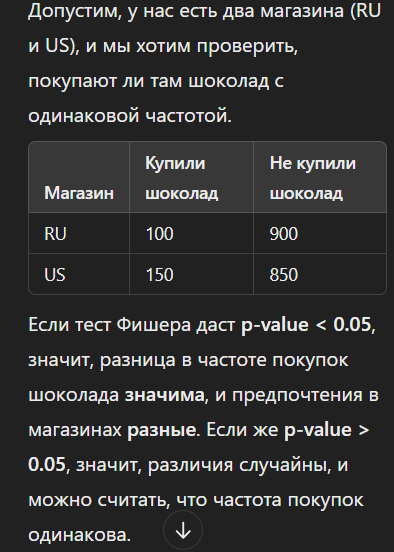
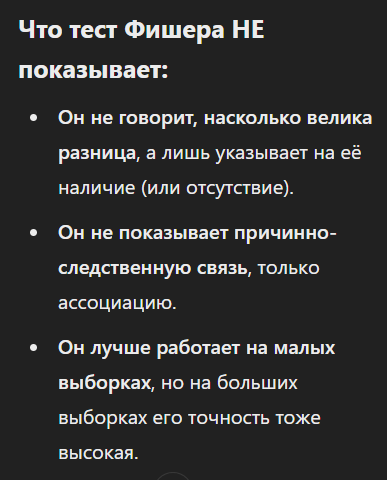
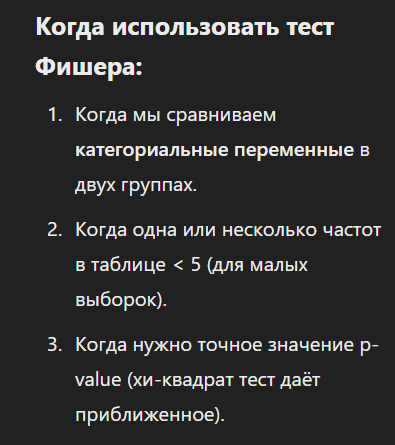
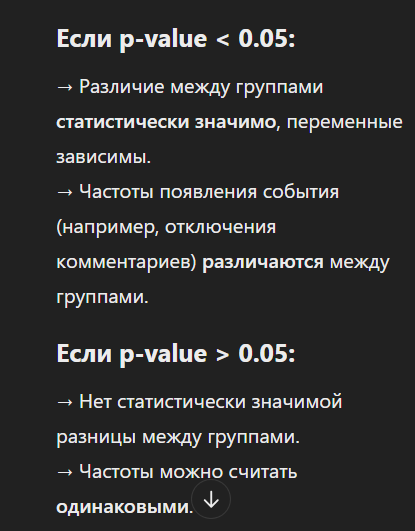

### 2.5 -- Сравнение количества комментариев у всех 3 каналов: Windy31, OneTwo и Kuplinov Play (ANOVA)

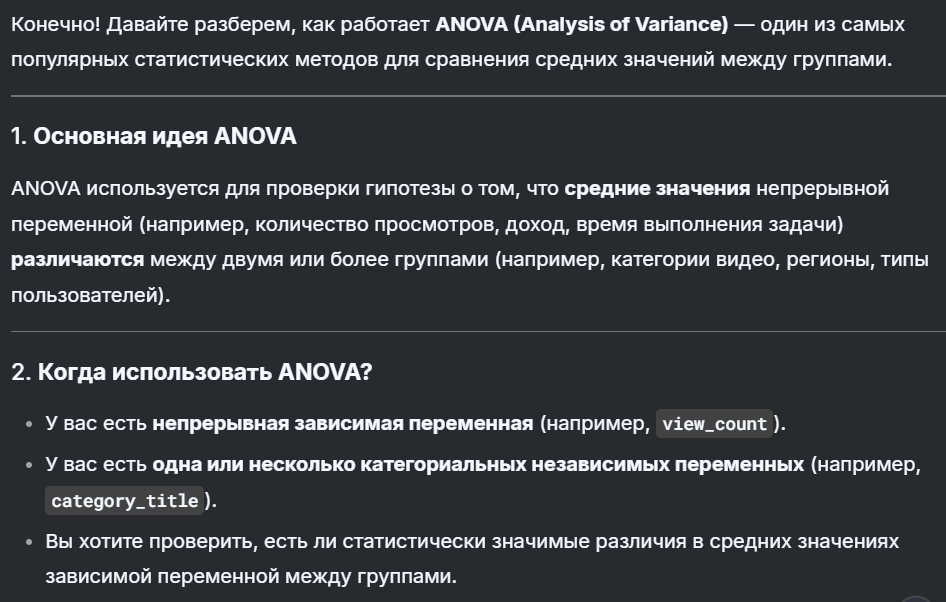
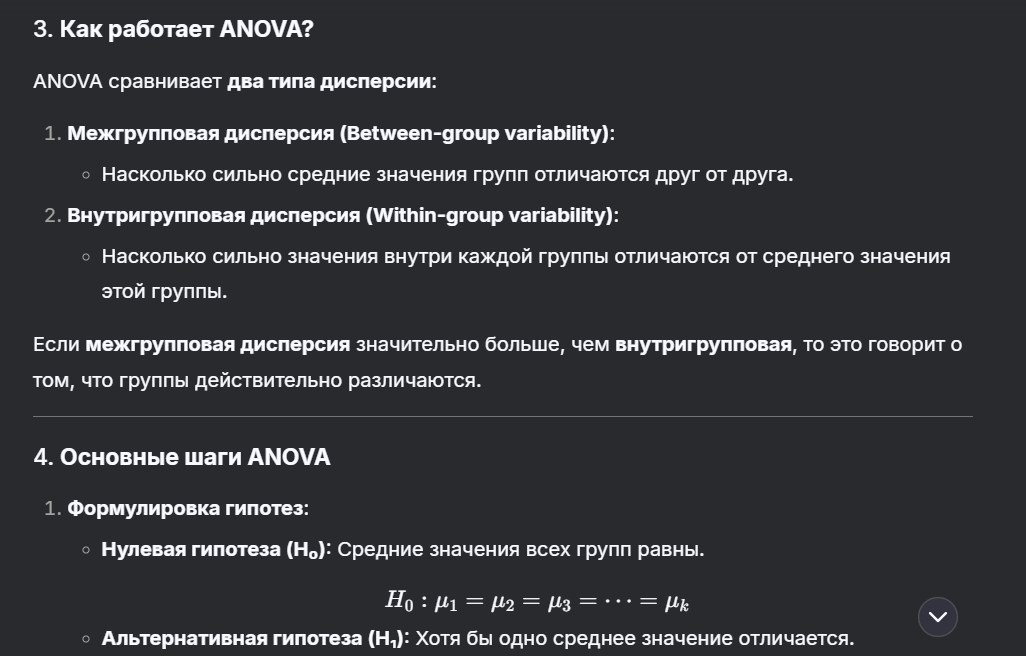
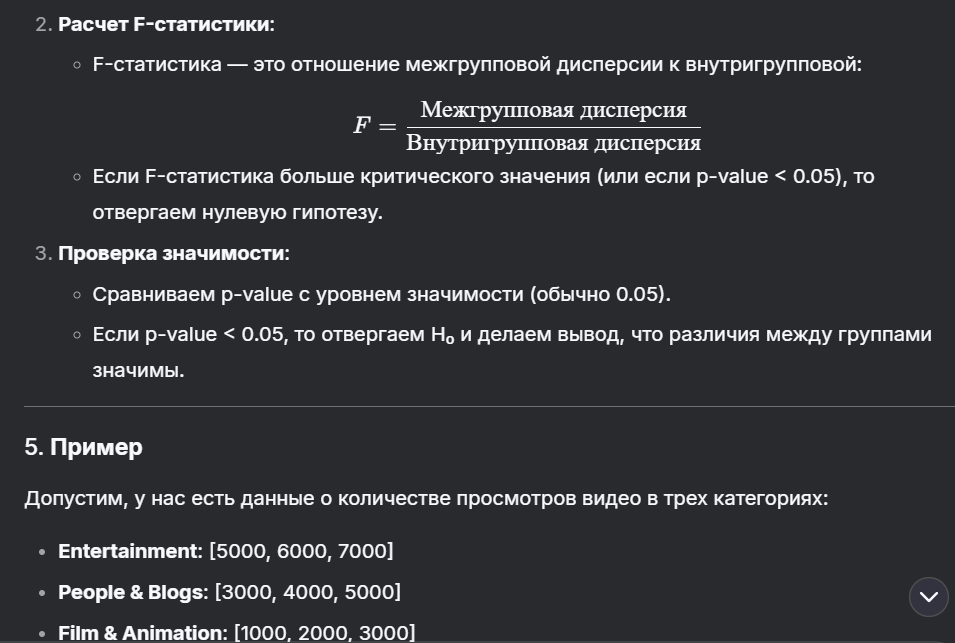
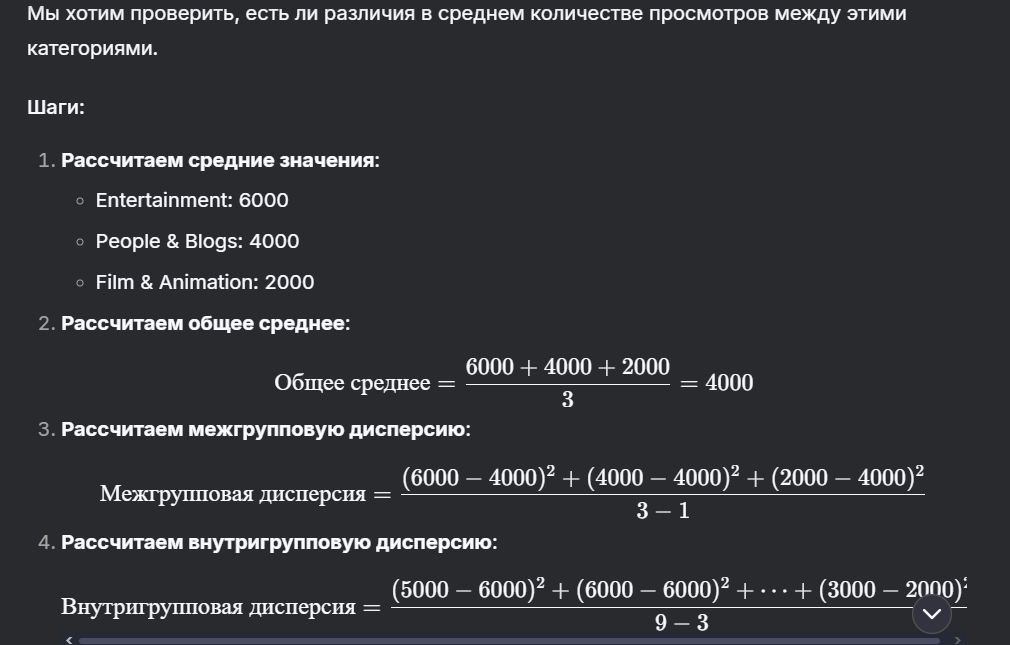
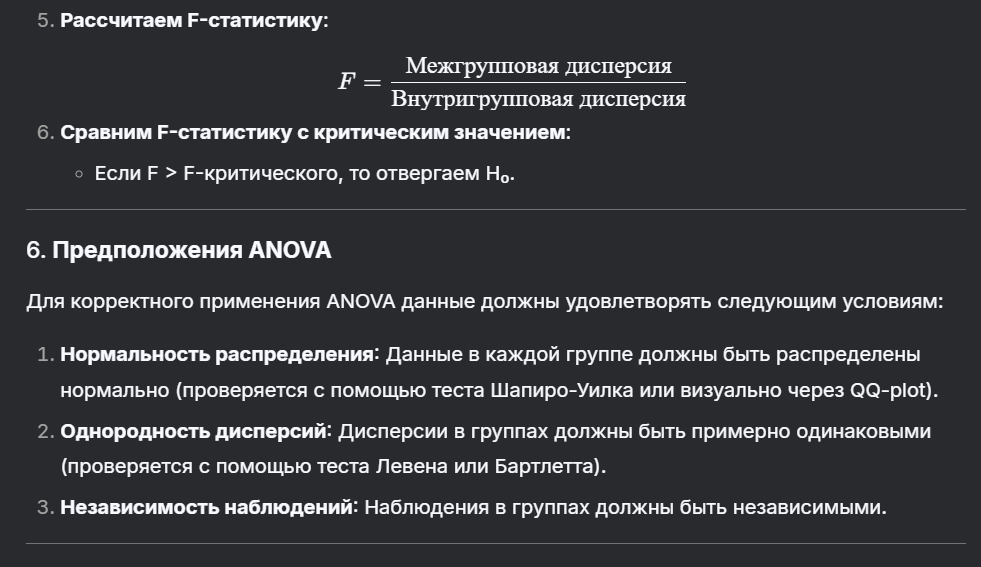
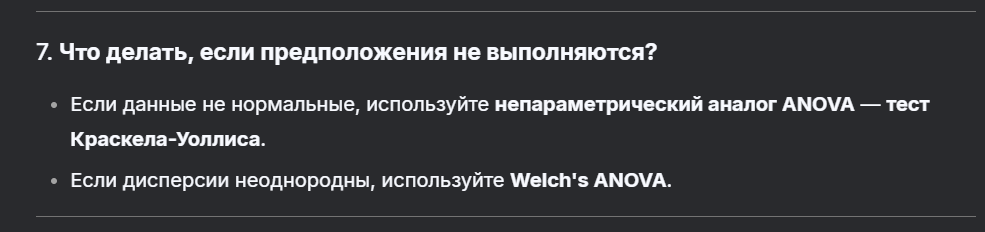

Text(0.5, 0, 'Отношение лайков к дизлайкам')

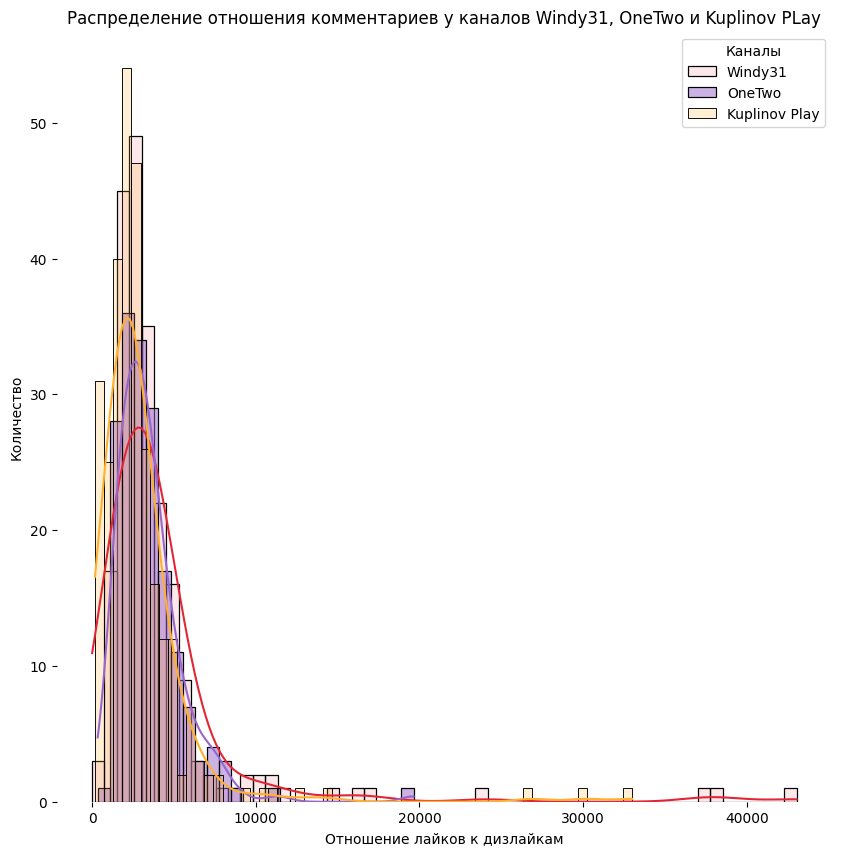

In [19]:
plt.figure(figsize = (10, 10))
sns.histplot(ru_segment_windy['comment_count'], kde = True, label = 'Windy31', color = '#E32636', alpha = 0.1)
sns.histplot(ru_segment_one_two['comment_count'], kde = True, label = 'OneTwo', color = '#9966CC')
sns.histplot(ru_segment_kuplinov['comment_count'], kde = True, label = 'Kuplinov Play', color = '#FFB02E', alpha = 0.2)
plt.title('Распределение отношения комментариев у каналов Windy31, OneTwo и Kuplinov PLay')
plt.legend(loc = 'upper right', title = 'Каналы')
plt.box(False)
plt.ylabel('Количество')
plt.xlabel('Отношение лайков к дизлайкам')

Text(0.5, 1.0, 'Лайки к дизайкам у Куплинова')

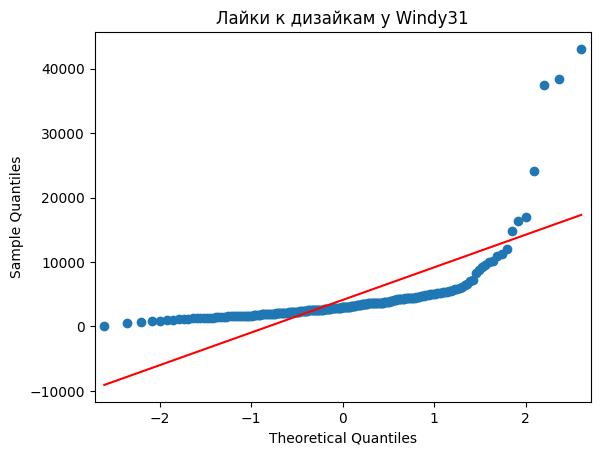

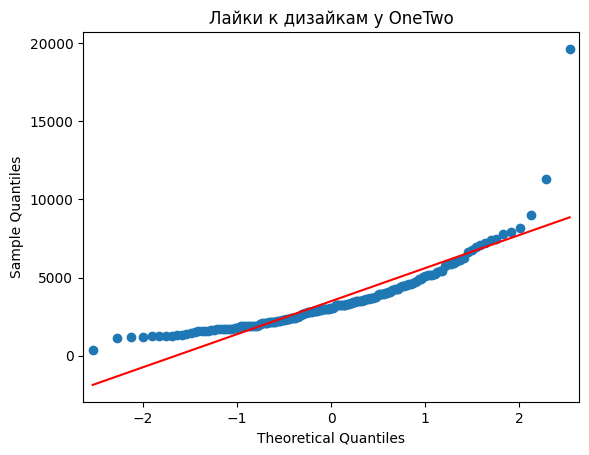

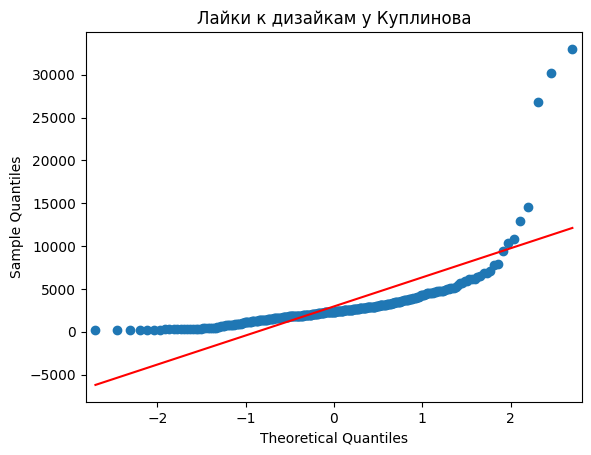

In [20]:
sm.qqplot(ru_segment_windy['comment_count'], line = 's')
plt.title('Лайки к дизайкам у Windy31')

sm.qqplot(ru_segment_one_two['comment_count'], line = 's')
plt.title('Лайки к дизайкам у OneTwo')

sm.qqplot(ru_segment_kuplinov['comment_count'], line = 's')
plt.title('Лайки к дизайкам у Куплинова')

Сделаем еще тест Шапиро-Уилка на проверку на нормальность

In [21]:
s1, p1 = sts.shapiro(ru_segment_windy['comment_count'])
s2, p2 = sts.shapiro(ru_segment_kuplinov['comment_count'])
s3, p3 = sts.shapiro(ru_segment_one_two['comment_count'])

print(f'Тест на нормальность данных у комментариев Windy31: p_value = {p1}')
print(f'Тест на нормальность данных у комментариев Kuplinov Play: p_value = {p2}')
print(f'Тест на нормальность данных у комментариев OneTwo: p_value = {p3}')

Тест на нормальность данных у комментариев Windy31: p_value = 2.3265084331560396e-25
Тест на нормальность данных у комментариев Kuplinov Play: p_value = 1.7528713040211168e-27
Тест на нормальность данных у комментариев OneTwo: p_value = 2.785815129782518e-15


Судя по графикам QQplot и Тесту Шапиро-Уилка у нас данные не распределены нормально

Проверим равенство дисперсий при помощи теста Левена

In [22]:
stat1, p_val1 = sts.levene(ru_segment_windy['comment_count'], ru_segment_kuplinov['comment_count'], ru_segment_one_two['comment_count'])
print(p_val1)

0.09054121174612531


У нас p_value вышло > 0.05, а это значит, что у наших 3 выборок одинаковые дисперсии
или что дисперсии можно считать **гомоскедастичными (то есть их дисперсии примерно одинаковы)**

Теперь применим аналог параметрическому тесту ANOVA -- тест Крускала-Уоллиса, так как у нас данные распределены не нормально

In [23]:
stat, pval = sts.kruskal(ru_segment_windy['comment_count'], ru_segment_kuplinov['comment_count'], ru_segment_one_two['comment_count'])
print(pval)

2.132215279661061e-08


У нас p_value < 0.05, это значит, что у нас распределения отличаюся сами по себе (то есть по какому-то одному параметру у нас распределения разные), а именно **не все 3 медианы у нас совпали**


Пример формулировки вывода
Если 
p-value<0.05:

"Существует статистически значимое различие в распределениях рангов между группами, что указывает на возможные различия в медианах."

Если p-value ≥ 0.05:

"Статистически значимых различий в распределениях рангов между группами не обнаружено."




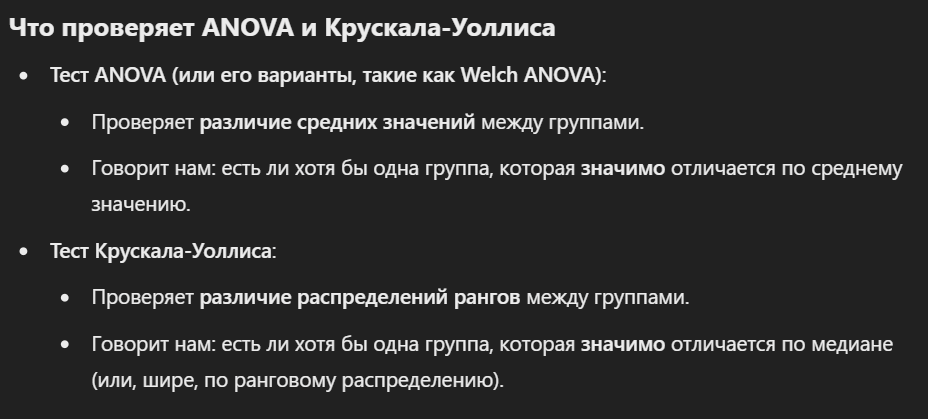

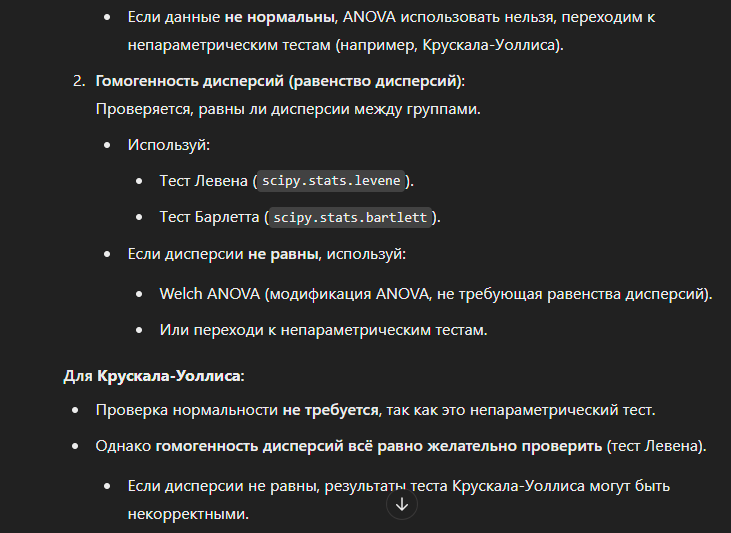
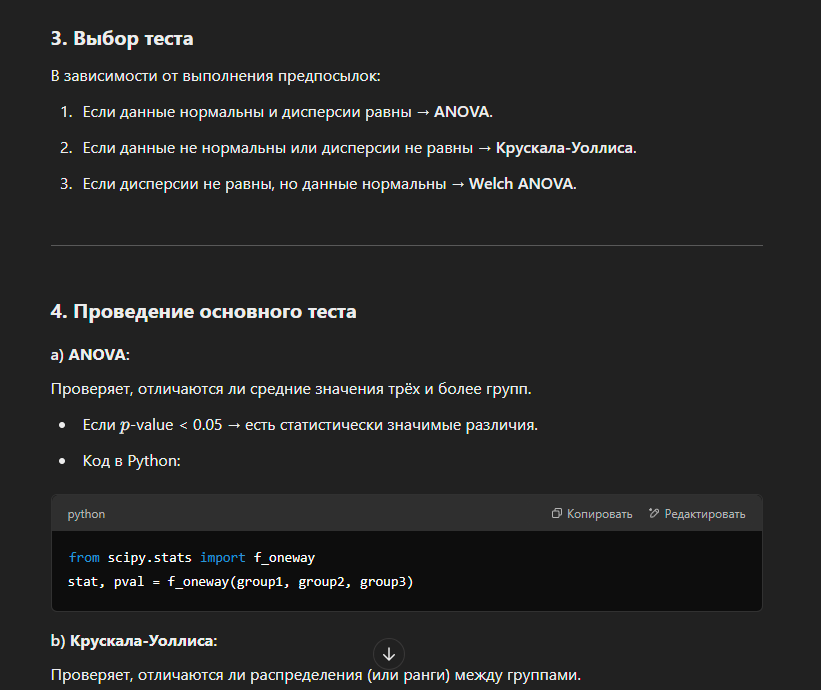
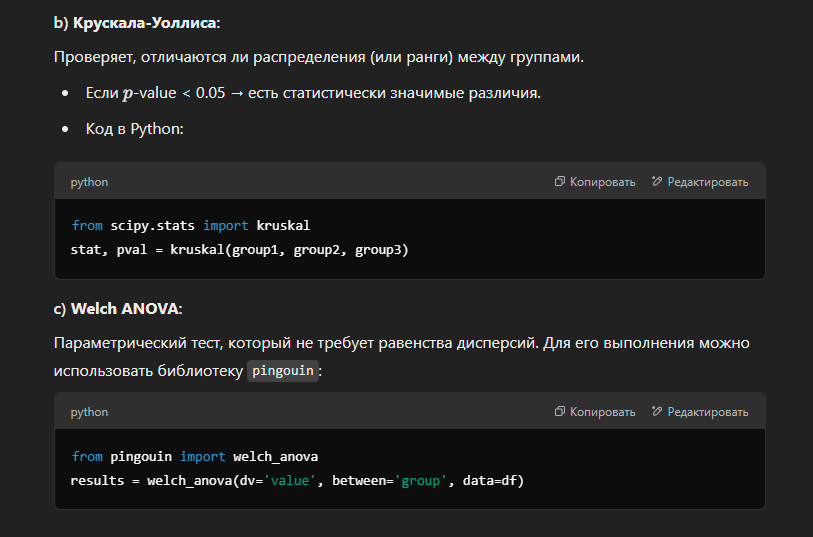

# 3 Часть -- Для >=3 сегментов сделайте попарные сравнения через тест Стьюдента и тест Фишера. Проверьте соотносятся ли результаты.

В чем отличие обычного теста Стьюдента от парного?
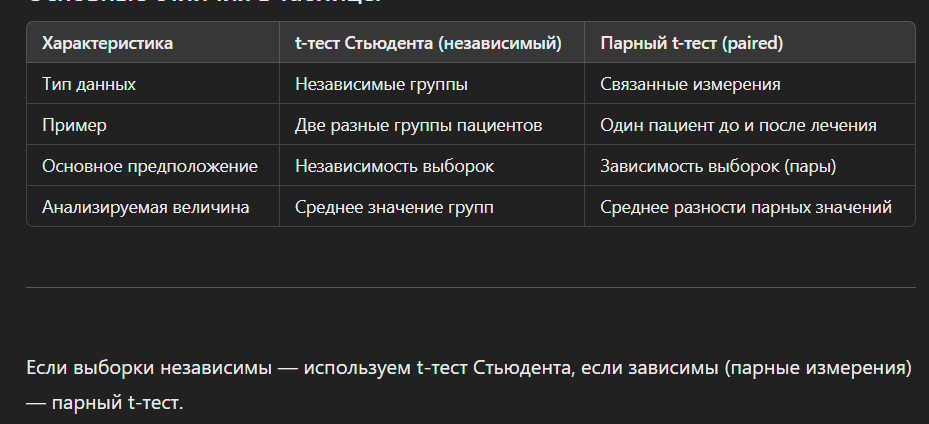

Давайте возьмем этих блогеров/каналы в ру сегменте, как и раньше
* Kuplinov ► Play
* windy31
* OneTwo

и рассмотрим их видео до 2021 года и после 2021


Попарные сравнения означают, что мы сравниваем каждую пару из нескольких групп по отдельности, а не все группы сразу

Например, если у нас есть 3 канала, то нам нужно провести сравнения между всеми возможными парами:

* OneTwo до 2021 vs OneTwo после 2021
* Kuplinov до 2021 vs Kuplinov после 2021
* Windy31 до 2021 vs Windy31 после 2021

Будем сравнивать эти группы по лайкам

### 3.1 -- OneTwo до 2021 vs OneTwo после 2021

In [24]:
ru_segment_one_two_before_2021 = ru_segment_one_two[
    pd.to_datetime(ru_segment_one_two['publishedAt']).dt.year <= 2021
]
ru_segment_one_two_after_2021 = ru_segment_one_two[
    pd.to_datetime(ru_segment_one_two['publishedAt']).dt.year >= 2022
]


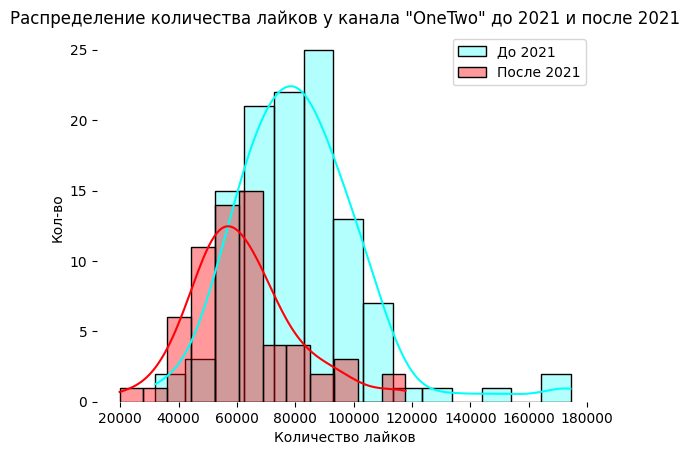

In [25]:
#plt.figure(figsize=(8, 8))
sns.histplot(x = ru_segment_one_two_before_2021['likes'], label =  'До 2021', kde = True, color = '#00fff9', alpha = 0.3)
sns.histplot(x = ru_segment_one_two_after_2021['likes'], label = 'После 2021', kde = True, color = '#ff0006', alpha = 0.4)
plt.title('Распределение количества лайков у канала "OneTwo" до 2021 и после 2021')
plt.xlabel('Количество лайков')
plt.ylabel('Кол-во')
plt.legend(loc='upper right')
plt.box(False)

Теперь посомтрим графическим способом, похожи ли наши группы на нормальное распредление

Text(0.5, 1.0, 'OneTwo после 2020')

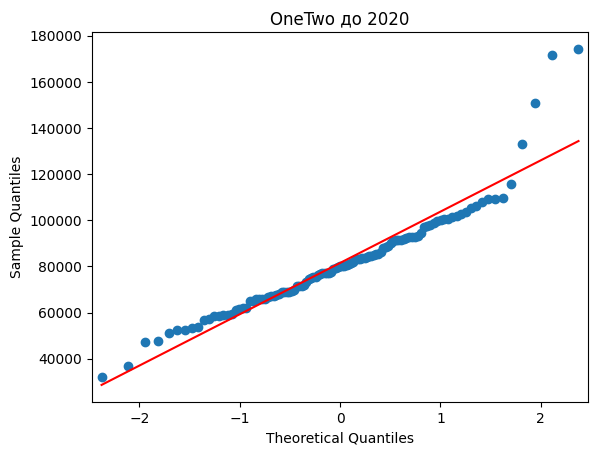

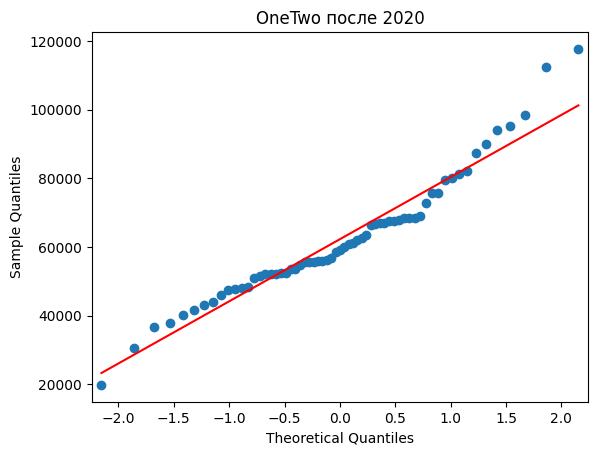

In [26]:
sm.qqplot(ru_segment_one_two_before_2021['likes'], line='s')
plt.title('OneTwo до 2020')

sm.qqplot(ru_segment_one_two_after_2021['likes'], line='s')
plt.title('OneTwo после 2020')

Как видно, у нас только обе выборки почти похожи на норамльное распределение. Давайте еще проведем тест Шапиро-Уилка для большей уверенности

In [27]:
statistics, p_value = sts.shapiro(ru_segment_one_two_before_2021['likes'])
print('Проверка на нормальность количество лайков у канала OneTwo до 2020 года (p_value):', p_value)

statistics, p_value = sts.shapiro(ru_segment_one_two_after_2021['likes'])
print('Проверка на нормальность количество лайков у канала OneTwo после 2020 года (p_value):', p_value)

Проверка на нормальность количество лайков у канала OneTwo до 2020 года (p_value): 1.527074334956931e-06
Проверка на нормальность количество лайков у канала OneTwo после 2020 года (p_value): 0.02224511359150568


Как видно -- наши данные уж точно не являются янормальным распределением, а значит, нам парный тест Сьюдента не подходит и нам нужен непараметрический аналог -- **тест Уилкоксона**

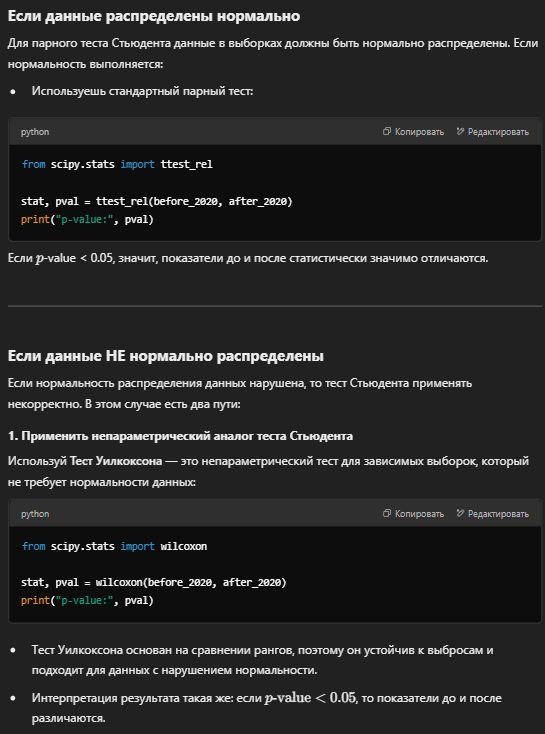

In [28]:
# нам надо сделать выборки одинакоыого размера, так как каждое значени еиз одной выборки должно сопоставляться с другой выборкой

m_s = min(ru_segment_one_two_before_2021.shape[0], ru_segment_one_two_after_2021.shape[0])
ru_segment_one_two_before_2021 = ru_segment_one_two_before_2021.iloc[:m_s]

stat1, p_value = sts.wilcoxon(ru_segment_one_two_before_2021['likes'], ru_segment_one_two_after_2021['likes'])
print(p_value)

2.6289948957979654e-07


Мы получили p_value < 0.05, поэтому мы отвергаем нклевую гипотезу и говорим о том, что все-таки медианные значения лайокв до 2020 года и после 2020 годов у OneTwo отличаются


### 3.2 -- Kuplinov до 2021 vs Kuplinov после 2021

In [29]:
ru_segment_kuplinov_before_2021 = ru_segment_kuplinov[
    pd.to_datetime(ru_segment_kuplinov['publishedAt']).dt.year <= 2021
]
ru_segment_kuplinov_after_2021 = ru_segment_kuplinov[
    pd.to_datetime(ru_segment_kuplinov['publishedAt']).dt.year >= 2022
]

print(ru_segment_kuplinov_before_2021.shape)
print(ru_segment_kuplinov_after_2021.shape)

m_s = min(ru_segment_kuplinov_before_2021.shape[0], ru_segment_kuplinov_after_2021.shape[0])
print(m_s)

(84, 20)
(203, 20)
84


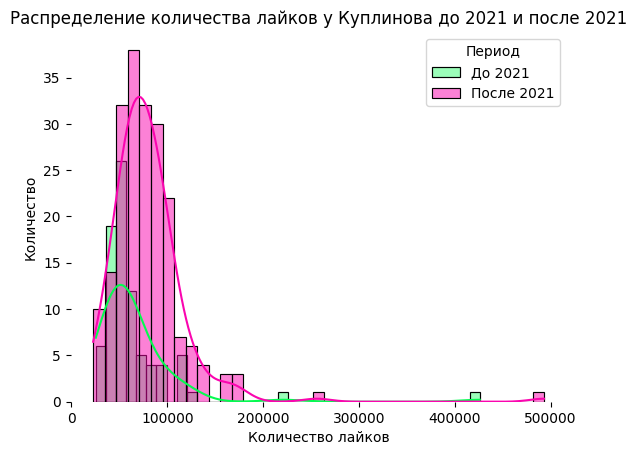

In [30]:
#plt.figure(figsize = (7, 7))
sns.histplot(ru_segment_kuplinov_before_2021['likes'], label = 'До 2021', color = '#05fa50', kde = True, alpha = 0.4)
sns.histplot(ru_segment_kuplinov_after_2021['likes'], label = 'После 2021', color = '#fa05af', kde = True)
plt.legend(title = 'Период', loc = 'upper right')
plt.title('Распределение количества лайков у Куплинова до 2021 и после 2021')
plt.ylabel('Количество')
plt.xlabel('Количество лайков')
plt.box(False)

Text(0.5, 1.0, 'Куплинов после 2021 года')

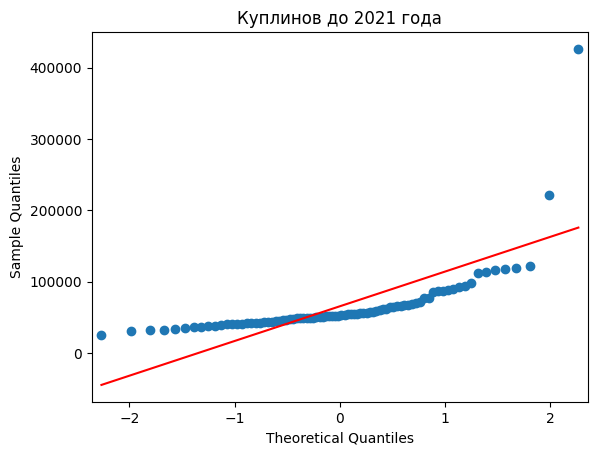

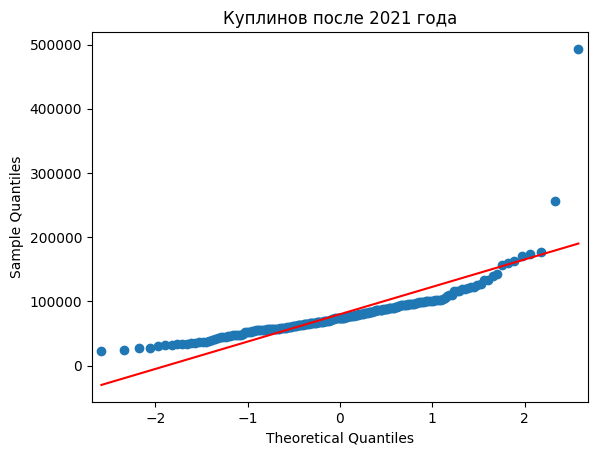

In [31]:
sm.qqplot(ru_segment_kuplinov_before_2021['likes'], line = 's')
plt.title('Куплинов до 2021 года')
sm.qqplot(ru_segment_kuplinov_after_2021['likes'], line = 's')
plt.title('Куплинов после 2021 года')

Как видно по графику -- у нас не все данные из этих выборок не походят на нормальное распределение, проверим их более точно через тест Шапиро-Уилка

In [32]:
stat1, pval1 = sts.shapiro(ru_segment_kuplinov_before_2021['likes'])
stat2, pval2 = sts.shapiro(ru_segment_kuplinov_after_2021['likes'])

print('Проверка на нормальность количества лайков у канала Kuplinov Play до 2021 года (p_value):', pval1)
print('Проверка на нормальность количества лайков у канала Kuplinov Play после 2021 года (p_value):', pval2)

Проверка на нормальность количества лайков у канала Kuplinov Play до 2021 года (p_value): 2.405526201452785e-15
Проверка на нормальность количества лайков у канала Kuplinov Play после 2021 года (p_value): 9.017627368071853e-20


Мда, опять у нас данные не нормально рапределены, тогда опять нам придется использовать тест парный непараметрический Уилкоксона

In [33]:
# урезаем данные

ru_segment_kuplinov_after_2021 = ru_segment_kuplinov_after_2021.iloc[:m_s]

stat1, p_value = sts.wilcoxon(ru_segment_kuplinov_before_2021['likes'], ru_segment_kuplinov_after_2021['likes'])
print(p_value)

0.00019615780164206948


Опять у нас p_value < 0.05, значит, у Куплинова разные медианные значения лайков до 2021 и после 2021 года

### 3.3 -- Windy31 до 2021 vs Windy31 после 2021

In [34]:
ru_segment_windy_before_2021 = ru_segment_windy[
    pd.to_datetime(ru_segment_windy['publishedAt']).dt.year <= 2021
]
ru_segment_windy_after_2021 = ru_segment_windy[
    pd.to_datetime(ru_segment_windy['publishedAt']).dt.year >= 2022
]

#print(ru_segment_windy_before_2021.shape)
#print(ru_segment_windy_after_2021.shape)

m_s = min(ru_segment_windy_before_2021.shape[0], ru_segment_windy_after_2021.shape[0])

Text(0.5, 1.0, 'Распределение количества лайков у канала "Windy31" до 2021 года и после 2021')

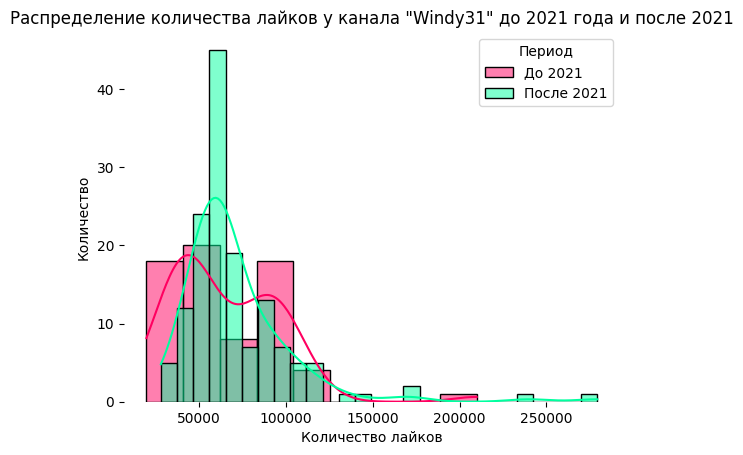

In [35]:
#plt.figure(figsize = (6, 6))
sns.histplot(x = ru_segment_windy_before_2021['likes'], kde = True, color = '#ff0060', alpha = 0.5, label = 'До 2021')
sns.histplot(x = ru_segment_windy_after_2021['likes'], kde = True, color = '#00ff9f', label = 'После 2021')
plt.box(False)
plt.legend(loc = 'upper right', frameon = True, title = 'Период')
plt.ylabel('Количество')
plt.xlabel('Количество лайков')
plt.title('Распределение количества лайков у канала "Windy31" до 2021 года и после 2021')

Text(0.5, 1.0, 'Windy после 2021')

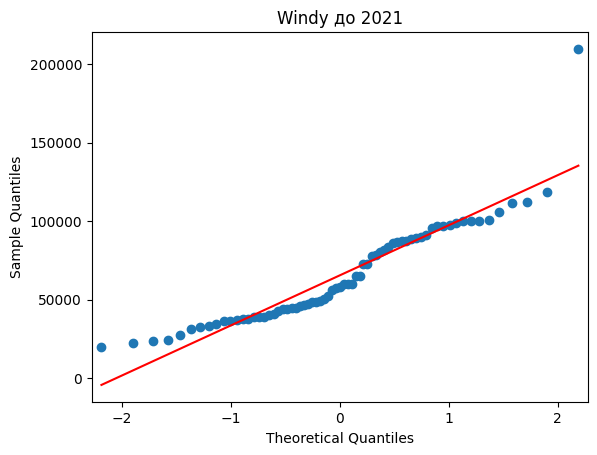

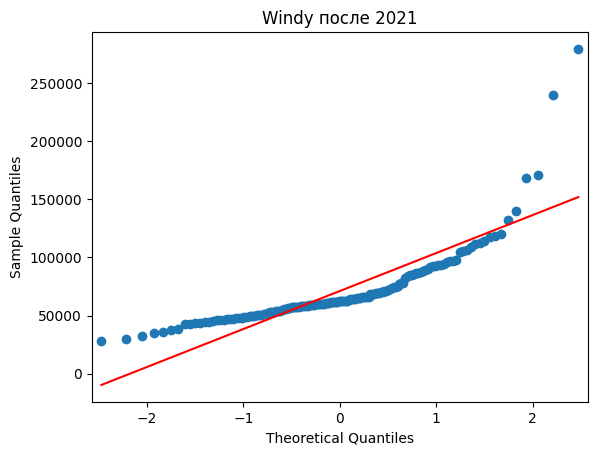

In [36]:
sm.qqplot(ru_segment_windy_before_2021['likes'], line = 's')
plt.title('Windy до 2021')

sm.qqplot(ru_segment_windy_after_2021['likes'], line = 's')
plt.title('Windy после 2021')

In [37]:
st1, pval1 = sts.shapiro(ru_segment_windy_before_2021['likes'])
st2, pval2 = sts.shapiro(ru_segment_windy_after_2021['likes'])

print('Проверка на нормальность количества лайков у канала Kuplinov Play (p_value):', pval1)
print('Проверка на нормальность количества лайков у канала Windy (p_value):', pval2)

Проверка на нормальность количества лайков у канала Kuplinov Play (p_value): 1.2179970192341897e-05
Проверка на нормальность количества лайков у канала Windy (p_value): 2.3767087504181497e-15


Да, в очередной раз у нас данные не нормально распределены, опять юзаем Уилкоксона

In [38]:
# опять режем данные

ru_segment_windy_after_2021 = ru_segment_windy_after_2021.iloc[:m_s]


statistics, p_value_w = sts.wilcoxon(ru_segment_windy_before_2021['likes'], ru_segment_windy_after_2021['likes'])
print(p_value_w)

0.13112408871507536


О, мы получили, p_value > 0.05, это значит, что медианные значения у Windy 31 до 2021 и после 2021 совпадают, стабильный блогер :)

## Зачем использовать парные тесты, когда есть и обычные?

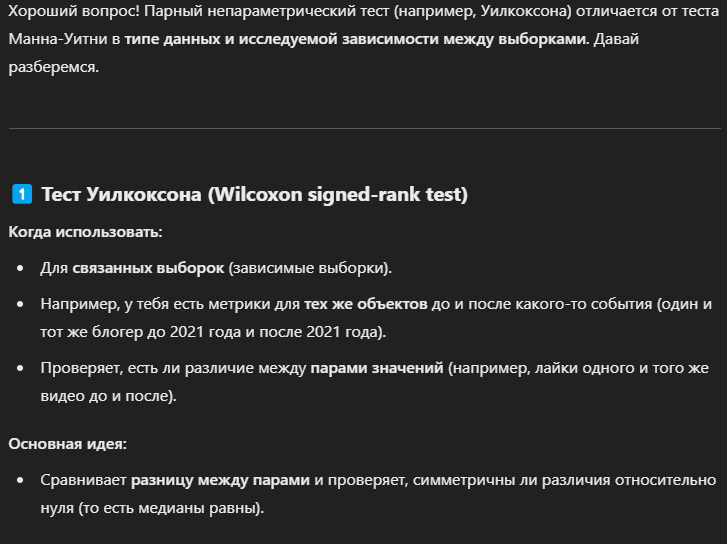
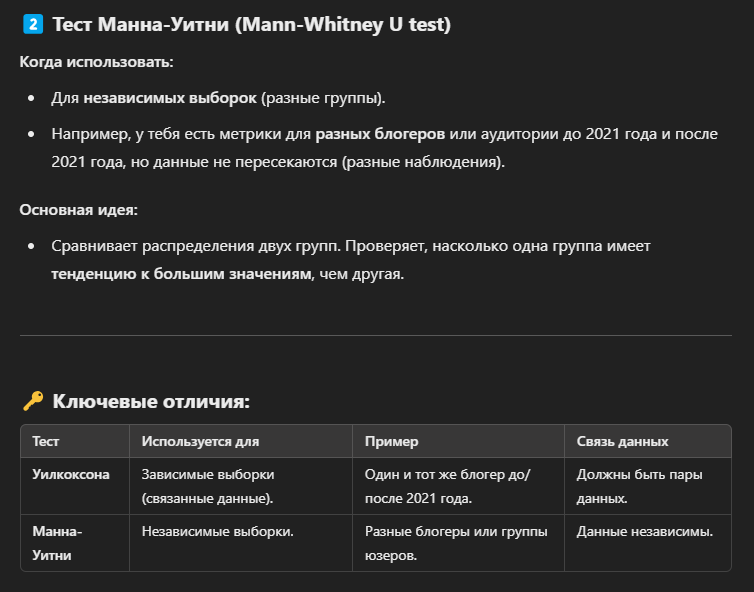
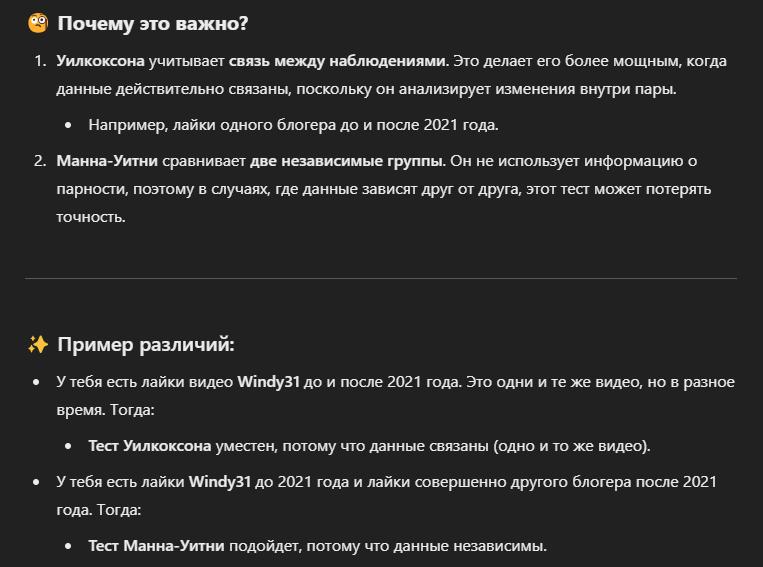
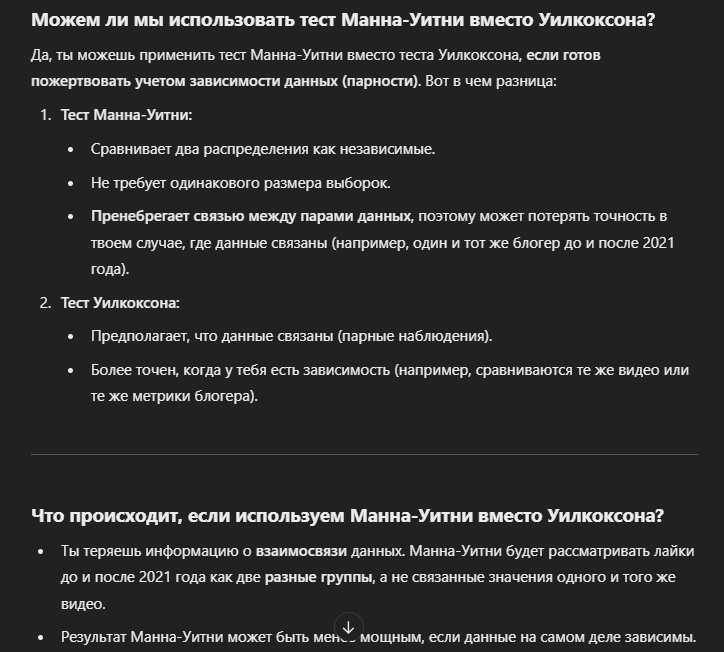
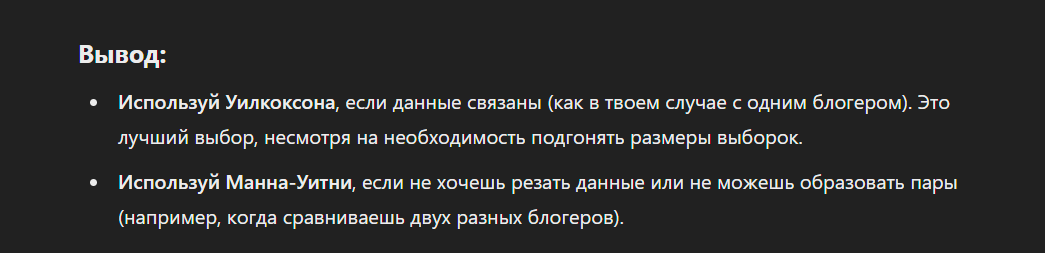


**Если использовать парный тест, то значения будут более точными**

# 4 Часть -- Постройте точный и эфронов доверительные интервал для выбранных метрик. Проверьте соответствуют ли эти доверительные интервалы результатам теста Стьюдента.

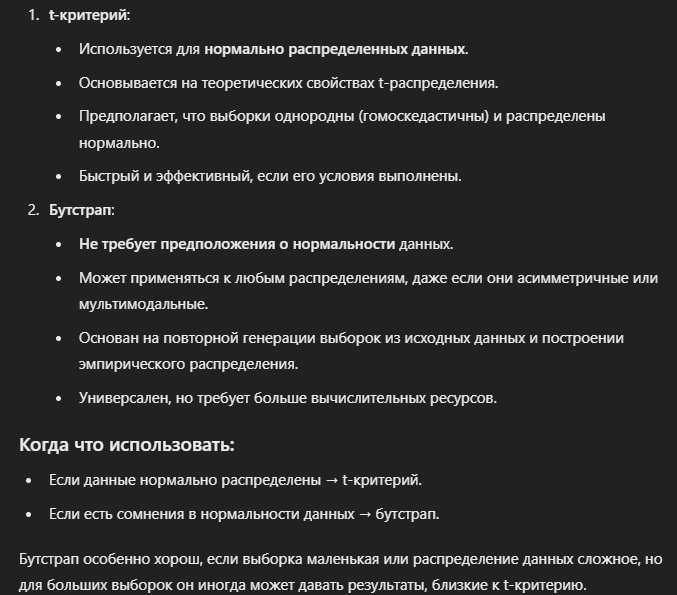

## 4.1 -- Просмотры у каналов "Kuplinov Play" и "Windy31"

In [39]:
display(ru_segment_kuplinov['view_count'])
display(ru_segment_windy['view_count'])

27089      809420
27403      512693
51921      497566
52326      545664
62581      369003
           ...   
195815     800500
198865     603918
199273     865543
199677     861435
199806    1078333
Name: view_count, Length: 287, dtype: int64

18157      399232
23464      302274
27740      393241
34148      237447
34993      604733
           ...   
194410    1336595
194584    1211082
195070    1064322
195427    1265189
198592     951599
Name: view_count, Length: 217, dtype: int64

Мы уже посмотрели, что наши данные не нормально распределены -- значит, будем использовать бутстрап и вычленять будем медианные значения


Истинное медианное значение просмотров у Куплинова: 675920.0
Медиана бутстрап выборок: 675920.0
Левая граница ДИ: 645076.0
Правая граница ДИ: 690083.1375
---
Истинная медиана просмотров у Windy31: 607189.0
Медиана бутстрап выборок: 607189.0
Левая граница ДИ: 598231.0
Правая граница ДИ: 617430.0


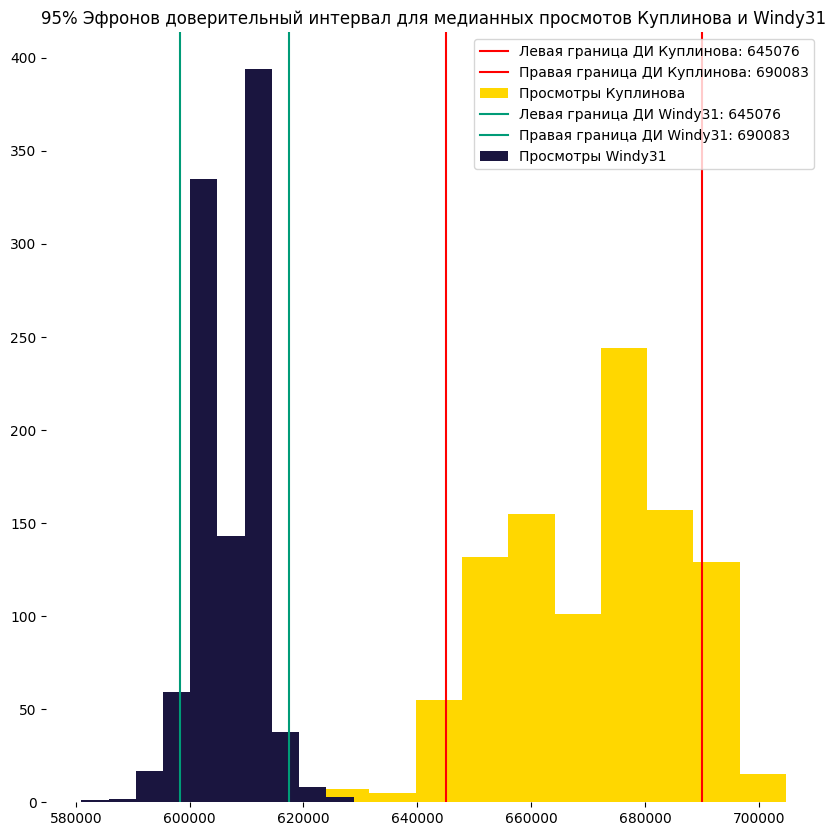

In [40]:
kuplinov_views = []
print(f'Истинное медианное значение просмотров у Куплинова: {np.median(ru_segment_kuplinov['view_count'])}')
for i in range(1000):
    kuplinov_views_i = np.median(np.random.choice(ru_segment_kuplinov['view_count'], 1000))
    kuplinov_views.append(kuplinov_views_i)

print(f'Медиана бутстрап выборок: {np.median(kuplinov_views)}')

left_line_kup = np.percentile(kuplinov_views, 2.5)
right_line_kup = np.percentile(kuplinov_views, 97.5)

print(f'Левая граница ДИ: {left_line_kup}')
print(f'Правая граница ДИ: {right_line_kup}')

print('---')

windy_views = []
print(f'Истинная медиана просмотров у Windy31: {np.median(ru_segment_windy['view_count'])}')
for i in range(1000):
    windy_views_i = np.median(np.random.choice(ru_segment_windy['view_count'], 1000))
    windy_views.append(windy_views_i)

print(f'Медиана бутстрап выборок: {np.median(windy_views)}')

left_line_wind = np.percentile(windy_views, 2.5)
right_line_wind = np.percentile(windy_views, 97.5)

print(f'Левая граница ДИ: {left_line_wind}')
print(f'Правая граница ДИ: {right_line_wind}')

plt.figure(figsize = (10, 10))
plt.axvline(left_line_kup, color = 'red', label = f'Левая граница ДИ Куплинова: {round(left_line_kup)}')
plt.axvline(right_line_kup, color = 'red', label = f'Правая граница ДИ Куплинова: {round(right_line_kup)}')
plt.hist(kuplinov_views, label = 'Просмотры Куплинова', color = '#FFD700')


plt.axvline(left_line_wind, color = '#009B77', label = f'Левая граница ДИ Windy31: {round(left_line_kup)}')
plt.axvline(right_line_wind, color = '#009B77', label = f'Правая граница ДИ Windy31: {round(right_line_kup)}')
plt.hist(windy_views, label='Просмотры Windy31', color = '#1A153F')
plt.legend(loc = 'upper right')
plt.box(False)
plt.title('95% Эфронов доверительный интервал для медианных просмотов Куплинова и Windy31')
plt.show()

Таким образом, мы можем утверждать с 95% уверенностью, что аудитория Куплинова больше, чем у Windy31, так как доверительные интервалы не пересекаются

С медианной точкой зрения, просмотры у Куплинова значимо больше, чем у Windy31

## 4.2 -- Лайки у каналов "Kuplinov Play" и "Windy31"

In [41]:
display(ru_segment_kuplinov['likes'])
display(ru_segment_windy['likes'])


27089      89450
27403     221447
51921      66868
52326      77832
62581      44608
           ...  
195815     72346
198865     69141
199273     80494
199677     85868
199806     88721
Name: likes, Length: 287, dtype: int64

18157     100910
23464      57721
27740     118582
34148      45688
34993     209841
           ...  
194410    104970
194584     93925
195070     92351
195427     96866
198592     92886
Name: likes, Length: 217, dtype: int64

Истинное медианное значение для лайков Куплинова: 67156.0
Медианное значение из бутстрап выборки: 67156.0
Левая граница ДИ Куплинова для медианы: 65572.0
Правая граница ДИ Куплинова для медианы: 69141.0
----
Истинное медианное значение для лайков Windy: 61750.0
Медианное значение из бутстрап выборки: 61750.0
Левая граница ДИ Windy для медианы: 60309.5
Правая граница ДИ Windy для медианы: 62768.5625


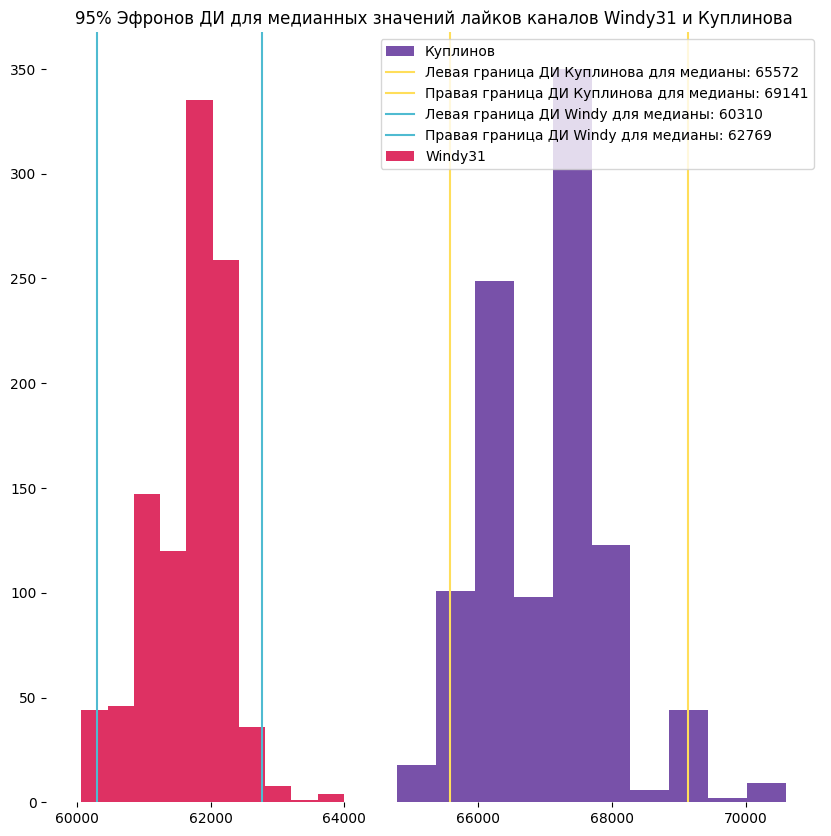

In [42]:
print(f'Истинное медианное значение для лайков Куплинова: {np.median(ru_segment_kuplinov['likes'])}')

kuplinov_likes = []

for i in range(1000):
    kuplinov_likes_i = np.median(np.random.choice(ru_segment_kuplinov['likes'], 1000))
    kuplinov_likes.append(kuplinov_likes_i)

print(f'Медианное значение из бутстрап выборки: {np.median(kuplinov_likes)}')

left_line_kup_likes = np.percentile(kuplinov_likes, 2.5)
right_line_kup_likes = np.percentile(kuplinov_likes, 97.5)

print(f'Левая граница ДИ Куплинова для медианы: {left_line_kup_likes}')
print(f'Правая граница ДИ Куплинова для медианы: {right_line_kup_likes}')

print('----')

print(f'Истинное медианное значение для лайков Windy: {np.median(ru_segment_windy['likes'])}')

windy_likes = []

for i in range(1000):
    windy_likes_i = np.median(np.random.choice(ru_segment_windy['likes'], 1000))
    windy_likes.append(windy_likes_i)

print(f'Медианное значение из бутстрап выборки: {np.median(windy_likes)}')

left_line_wind_likes = np.percentile(windy_likes, 2.5)
right_line_wind_likes = np.percentile(windy_likes, 97.5)

print(f'Левая граница ДИ Windy для медианы: {left_line_wind_likes}')
print(f'Правая граница ДИ Windy для медианы: {right_line_wind_likes}')

plt.figure(figsize = (10, 10))
plt.hist(kuplinov_likes, color = '#7851A9', label = 'Куплинов')
plt.axvline(left_line_kup_likes, color = '#FFDE5A', label = f'Левая граница ДИ Куплинова для медианы: {round(left_line_kup_likes)}')
plt.axvline(right_line_kup_likes, color = '#FFDE5A', label = f'Правая граница ДИ Куплинова для медианы: {round(right_line_kup_likes)}')

plt.axvline(left_line_wind_likes, color = '#4FBBD1', label = f'Левая граница ДИ Windy для медианы: {round(left_line_wind_likes)}')
plt.axvline(right_line_wind_likes, color = '#4FBBD1', label = f'Правая граница ДИ Windy для медианы: {round(right_line_wind_likes)}')

plt.hist(windy_likes, color = '#DE3163', label = 'Windy31')
plt.title('95% Эфронов ДИ для медианных значений лайков каналов Windy31 и Куплинова')
plt.legend(loc = 'upper right')
plt.box(False)

Как и с прошлым графиком -- наши доверительные интервалы не совпали, а это значит, что у нас медианы у этих 2 каналов различны

**ОДНАКО**

Тест Манна-Уитни нам показал p_value ~0.07 и сказал, что у нас медианы совпадают


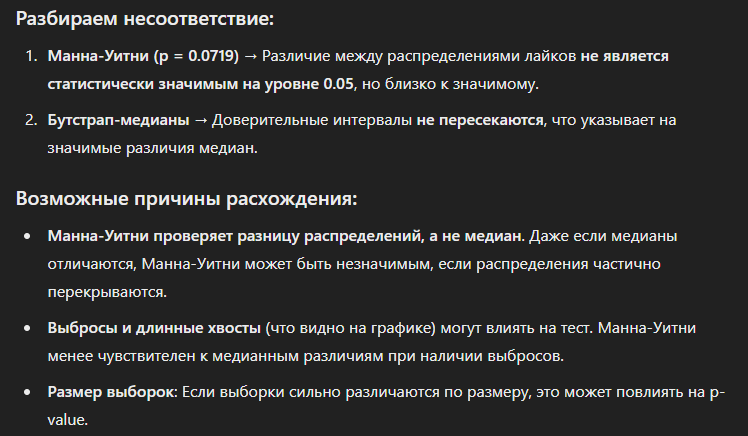

Но бутстрап надежнее :)

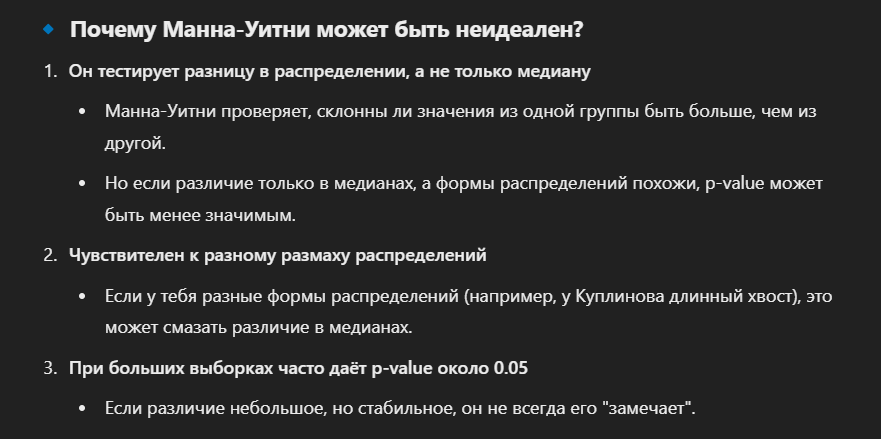
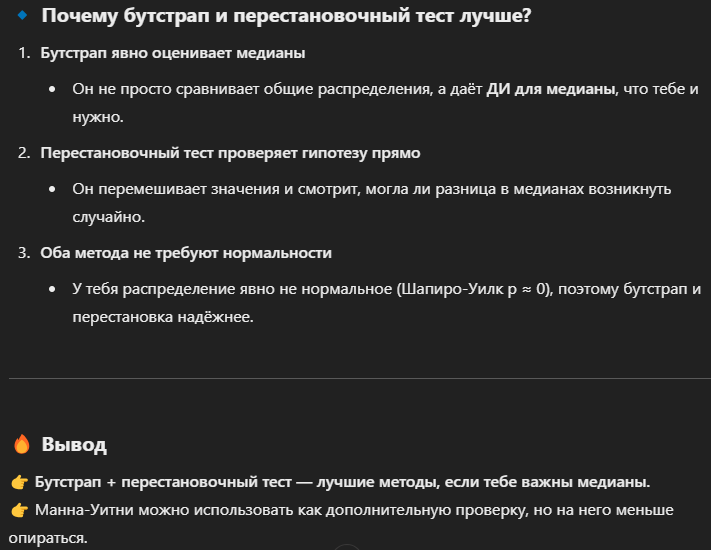

## 4.3 -- Количество комментариев у всех 3 каналов: Windy31, OneTwo и Kuplinov Play

In [43]:
display(ru_segment_windy['comment_count'])
display(ru_segment_one_two['comment_count'])
display(ru_segment_kuplinov['comment_count'])

18157     17040
23464      3672
27740     16419
34148      3745
34993     37430
          ...  
194410     9216
194584     8293
195070     9960
195427     6561
198592     7135
Name: comment_count, Length: 217, dtype: int64

18        7092
1438      4231
2433      4255
3236      3616
3630      3212
          ... 
193827    1264
194255    2412
196379    2192
196890    2084
197839    1918
Name: comment_count, Length: 176, dtype: int64

27089       958
27403     26850
51921      3982
52326      5743
62581      2392
          ...  
195815      325
198865     2674
199273     3338
199677     2917
199806     2923
Name: comment_count, Length: 287, dtype: int64

Истинное медианное значение для комментариев Windy: 2960.0
Медианное значение бутсрап выборок для комментариев Windy: 2960.0
Левая граница ДИ Windy для медианы комментариев: 2895.0
Правая граница ДИ Windy для медианы комментариев: 3038.0
----
Истинное медианное значение для комментариев OneTwo: 3060.0
Медианное значение из бутстрап выборок комментариев OneTwo: 3057.0
Левая граница ДИ OneTwo для медианы комментариев: 2988.0
Правая граница ДИ OneTwo для медианы комментариев: 3247.0
----
Истинное медианное значение для комментариев Kuplinov: 2351.0
Медианное значение из бутстрап выборки комментариев Kuplinov: 2351.0
Левая граница ДИ Kuplinovа для медианы комментариев: 2267.5
Правая граница ДИ Kuplinovа для медианы комментариев: 2418.125
----


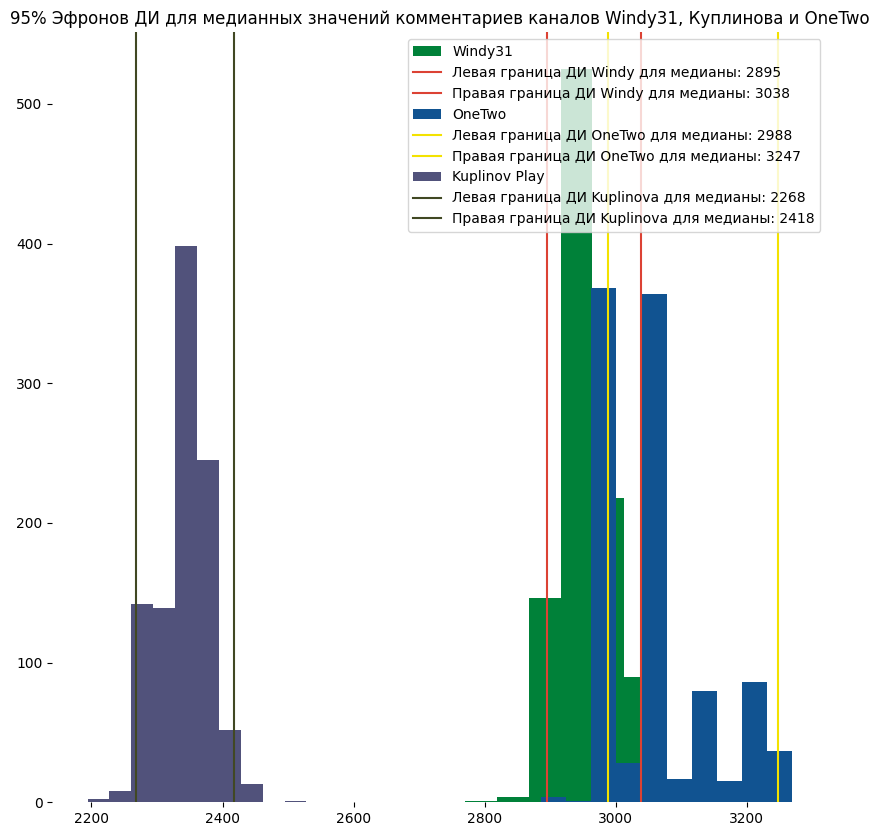

In [44]:
print(f'Истинное медианное значение для комментариев Windy: {np.median(ru_segment_windy['comment_count'])}')

windy_comments = []
for i in range(1000):
    windy_comments_i = np.median(np.random.choice(ru_segment_windy['comment_count'], 1000))
    windy_comments.append(windy_comments_i)


print(f'Медианное значение бутсрап выборок для комментариев Windy: {np.median(windy_comments)}')

left_line_wind_comments = np.percentile(windy_comments, 2.5)

right_line_wind_comments = np.percentile(windy_comments, 97.5)

print(f'Левая граница ДИ Windy для медианы комментариев: {left_line_wind_comments}')

print(f'Правая граница ДИ Windy для медианы комментариев: {right_line_wind_comments}')

print('----')

print(f'Истинное медианное значение для комментариев OneTwo: {np.median(ru_segment_one_two['comment_count'])}')

one_two_comments = []

for i in range(1000):
    one_two_comments_i = np.median(np.random.choice(ru_segment_one_two['comment_count'], 1000))
    one_two_comments.append(one_two_comments_i)

print(f'Медианное значение из бутстрап выборок комментариев OneTwo: {np.median(one_two_comments)}')

left_line_one_two_comments = np.percentile(one_two_comments, 2.5)

right_line_one_two_comments = np.percentile(one_two_comments, 97.5)

print(f'Левая граница ДИ OneTwo для медианы комментариев: {left_line_one_two_comments}')

print(f'Правая граница ДИ OneTwo для медианы комментариев: {right_line_one_two_comments}')

print('----')

print(f'Истинное медианное значение для комментариев Kuplinov: {np.median(ru_segment_kuplinov['comment_count'])}')

kuplinov_comments = []

for i in range(1000):
    kuplinov_comments_i = np.median(np.random.choice(ru_segment_kuplinov['comment_count'], 1000))
    kuplinov_comments.append(kuplinov_comments_i)

print(f'Медианное значение из бутстрап выборки комментариев Kuplinov: {np.median(kuplinov_comments)}')

left_line_kup_comments = np.percentile(kuplinov_comments, 2.5)

right_line_kup_comments = np.percentile(kuplinov_comments, 97.5)

print(f'Левая граница ДИ Kuplinovа для медианы комментариев: {left_line_kup_comments}')

print(f'Правая граница ДИ Kuplinovа для медианы комментариев: {right_line_kup_comments}')

print('----')


plt.figure(figsize = (10, 10))
plt.hist(windy_comments, color = '#008139', label = 'Windy31')
plt.axvline(left_line_wind_comments, color = '#DC4234', label = f'Левая граница ДИ Windy для медианы: {round(left_line_wind_comments)}')
plt.axvline(right_line_wind_comments, color = '#DC4234', label = f'Правая граница ДИ Windy для медианы: {round(right_line_wind_comments)}')

plt.hist(one_two_comments, color = '#115391', label = 'OneTwo')

plt.axvline(left_line_one_two_comments, color = '#F3E200', label = f'Левая граница ДИ OneTwo для медианы: {round(left_line_one_two_comments)}')

plt.axvline(right_line_one_two_comments, color = '#F3E200', label = f'Правая граница ДИ OneTwo для медианы: {round(right_line_one_two_comments)}')

plt.hist(kuplinov_comments, color = '#51527B', label = 'Kuplinov Play')

plt.axvline(left_line_kup_comments, color = '#414823', label = f'Левая граница ДИ Kuplinovа для медианы: {round(left_line_kup_comments)}')
plt.axvline(right_line_kup_comments, color = '#414823', label = f'Правая граница ДИ Kuplinovа для медианы: {round(right_line_kup_comments)}')


plt.title('95% Эфронов ДИ для медианных значений комментариев каналов Windy31, Куплинова и OneTwo')
plt.legend(loc = 'upper right')
plt.box(False)


Как видно, у нас интервалы для Windy и OneTwo пересекаются, а это значит, что  медианные значения у этих каналов совпадают. Это у нас совпало с тестом Уилкоксона)

# 5 Часть -- Подумайте, можно ли использовать в пункте 2 другие стат. тесты. Приведите пару примеров.

## Перестановочный тест (permutation test)

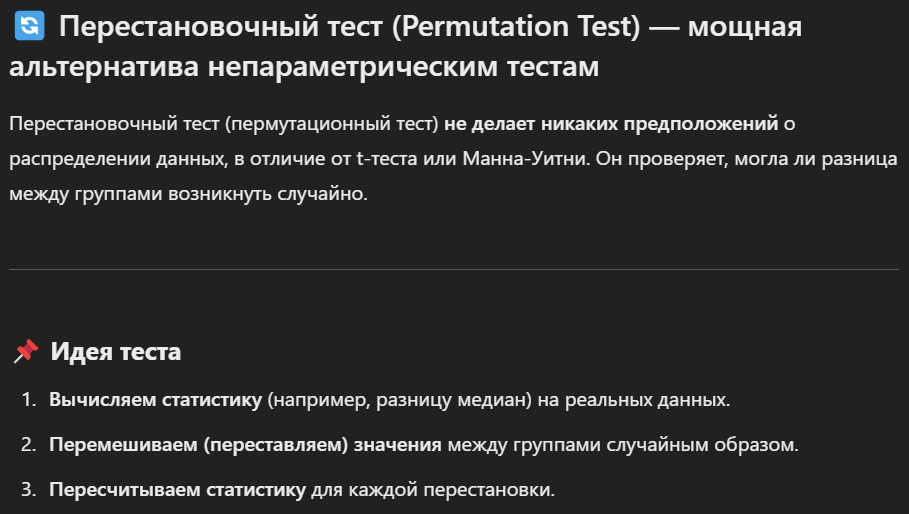
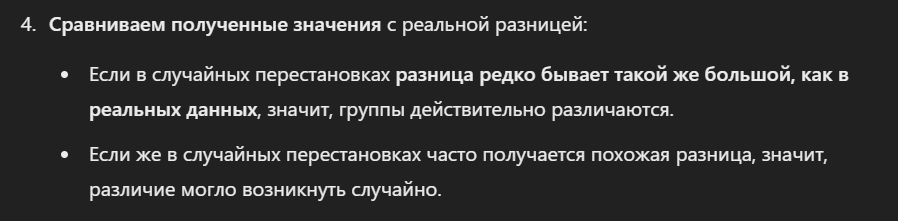
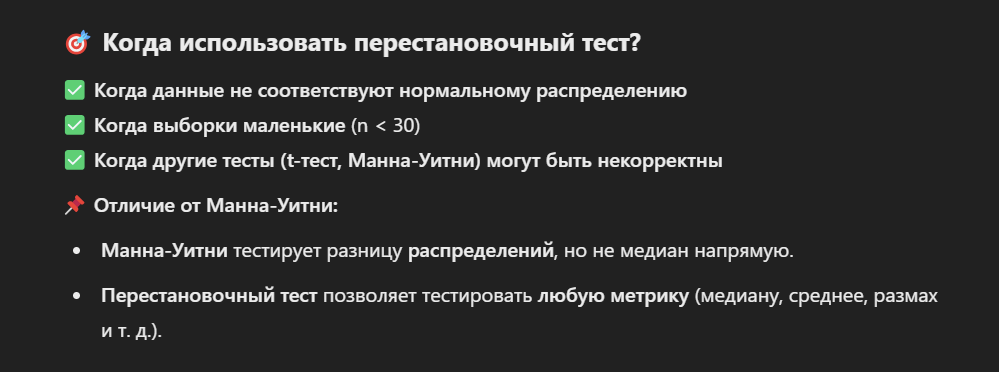
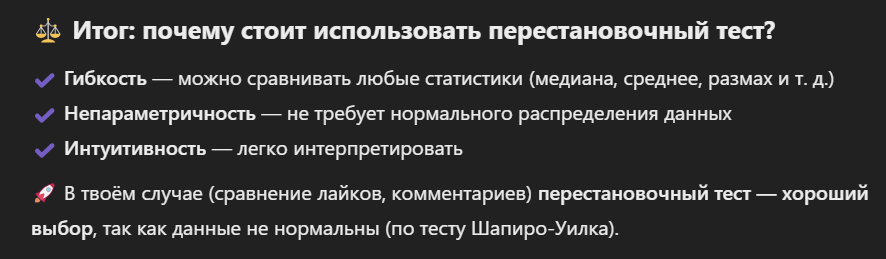

Проведем перестановочный тест на лайках у каналов "Kuplinov Play" и "Windy31"

In [45]:
def statistics(x, y, axis):
    return np.median(x, axis=axis) - np.median(y, axis=axis)

print(sts.permutation_test((ru_segment_kuplinov['likes'], ru_segment_windy['likes']), statistic=statistics).pvalue)


0.0194


У нас получилось меньше 0.05, значит, медианы у нас различаются. А вот тест Манна Уитни показал нам неправду

## Критерий Колмогорова-Смирнова (Kolmogorov-Smirnov Test)


Используется для проверки, одинаково ли распределены две выборки

Давайте посмотрим на совпадение друг с другом просмотров у каналов "Kuplinov Play" и "Windy31"

In [46]:
print(sts.ks_2samp(ru_segment_kuplinov['view_count'], ru_segment_windy['view_count']))

KstestResult(statistic=0.14836461728672587, pvalue=0.007584603299071659, statistic_location=756312, statistic_sign=-1)


Как видно, у нас p_value меньше, чем 0.05, значит, мы гооврим о том, что у нас выборки все-таки по разному распределены